## Verifying the install

In [ ]:
import torch

In [ ]:
print(torch.__version__)

1.10.1


In [ ]:
torch.cuda.is_available()

False

In [ ]:
torch.version.cuda

'10.2'

Vu que j'ai vuda de disponible mais pas disponible, cela veut sûrement dire que mon GPU n'est pas supporté. 

## Torch: learn the basics

Tutoriel venant d'ici: https://pytorch.org/tutorials/beginner/basics/intro.html
Most of my notes and comments are pasted from those of the tutorial, or atleast very close. But I haven't pasted all the comments so the tutorial on the pytorch website provides much more informations

### 1 - Tensors

In [ ]:
import torch
import numpy as np

Tensors are basically just ndarrays

In [ ]:
# Tensor from data
data = [[1,2],[3,4]]
x_data = torch.tensor(data)

In [ ]:
# Tensor from numpy array
np_array = np.array(data)
x_np = torch.from_numpy(np_array)

In [ ]:
# Tensor from another tensor
x_ones = torch.ones_like(x_data) #retains the properties of x_data
print(f"Ones Tensor: \n {x_ones} \n")
x_rand = torch.rand_like(x_data, dtype = torch.float) #overrides the data type of x_data
print(f"Random Tensor: \n {x_rand} \n")

Ones Tensor: 
 tensor([[1, 1],
        [1, 1]]) 

Random Tensor: 
 tensor([[0.5975, 0.1023],
        [0.0953, 0.3733]]) 



In [ ]:
# With random or constant values
shape = (2,3,)
rand_tensor = torch.rand(shape)
ones_tensor = torch.ones(shape)
zeros_tensor = torch.zeros(shape)

print(f"Random tensor: \n {rand_tensor} \n")
print(f"Ones tensor: \n {ones_tensor} \n")
print(f"Zeros tensor: \n {zeros_tensor} \n")


Random tensor: 
 tensor([[0.0926, 0.1569, 0.2240],
        [0.3331, 0.4744, 0.7495]]) 

Ones tensor: 
 tensor([[1., 1., 1.],
        [1., 1., 1.]]) 

Zeros tensor: 
 tensor([[0., 0., 0.],
        [0., 0., 0.]]) 



In [ ]:
tensor = torch.rand(3,4)
print(f"Shape of tensor: {tensor.shape}")
print(f"Datatype of tensor: {tensor.dtype}")
print(f"Device tensor is stored on: {tensor.device}")

Shape of tensor: torch.Size([3, 4])
Datatype of tensor: torch.float32
Device tensor is stored on: cpu


Operations on tensors can be ran faster on GPU than in CPU. Tensors need to be moved explicitly from CPU to GPU to do so, this operation can come at a computational cost.

In [ ]:
# Move our tensor to the GPU if available

if torch.cuda.is_available():
    tensor = tensor.to('cuda')
    print("cuda was available")
else:
    print("cuda not available")

cuda not available


In [ ]:
# Operations on tensors

tensor = torch.ones(4,4)
print('First row: ', tensor[0])
print('First column: ', tensor[:,0])
print('Last column: ', tensor[..., -1])
tensor[:,1] = 0 
print(tensor)

First row:  tensor([1., 1., 1., 1.])
First column:  tensor([1., 1., 1., 1.])
Last column:  tensor([1., 1., 1., 1.])
tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])


In [ ]:
# Joining tensors 
t1 = torch.cat([tensor, tensor, tensor], dim = 1) #torch.stack is another way to join, a bit different
print(t1)

tensor([[1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.]])


In [ ]:
# Matrix multiplication: y1, y2 & y3 will have the same value
y1 = tensor @ tensor.T
y2 = tensor.matmul(tensor.T)
y3 = torch.rand_like(tensor)
torch.matmul(tensor, tensor.T, out = y3)
print(y1, '\n', y2, '\n', y3)

tensor([[3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.]]) 
 tensor([[3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.]]) 
 tensor([[3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.]])


In [ ]:
# Element wise product: z1, z2 & z3 will have the same value
z1 = tensor * tensor
z2 = tensor.mul(tensor)
z3 = torch.rand_like(tensor)
torch.mul(tensor, tensor, out = z3)
print(z1, '\n', z2, '\n', z3)

tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]]) 
 tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]]) 
 tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])


In [ ]:
# Conversion of a one-element tensor to a python numerical value
agg = tensor.sum()
agg_item = agg.item()
print(agg_item, type(agg_item))

12.0 <class 'float'>


In [ ]:
# In-place operations are denoted by the "_" suffix
print(tensor, '\n')
tensor.add_(5)
print(tensor)
# They save memory but makes us loose history, so we are not using them so much

tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]]) 

tensor([[6., 5., 6., 6.],
        [6., 5., 6., 6.],
        [6., 5., 6., 6.],
        [6., 5., 6., 6.]])


A tensor and numpy array can share the same memory location, so that a change in one of them will also change the other

In [ ]:
# Tensor to NumPy array
t = torch.ones(5)
print(f"t: {t}")
n = t.numpy()
print(f"n:{n}")

t.add_(1)
print(f"t: {t}")
print(f"n:{n}")

t: tensor([1., 1., 1., 1., 1.])
n:[1. 1. 1. 1. 1.]
t: tensor([2., 2., 2., 2., 2.])
n:[2. 2. 2. 2. 2.]


In [ ]:
# NumPy array to tensor
n = np.ones(5)
t = torch.from_numpy(n)

np.add(n, 1, out=n)
print(f"t: {t}")
print(f"n: {n}")

t: tensor([2., 2., 2., 2., 2.], dtype=torch.float64)
n: [2. 2. 2. 2. 2.]


### 2 - Datasets and dataloaders

DataLoader adds an iterable arround the Dataset

In [ ]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

In [ ]:
# This code creates a "data" folder in which the data are stored

training_data = datasets.FashionMNIST(
    root = "data",
    train = True,
    download = True,
    transform = ToTensor())

test_data = datasets.FashionMNIST(
    root = "data",
    train = True,
    download = False,
    transform = ToTensor())

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting data\FashionMNIST\raw\train-images-idx3-ubyte.gz to data\FashionMNIST\raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting data\FashionMNIST\raw\train-labels-idx1-ubyte.gz to data\FashionMNIST\raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting data\FashionMNIST\raw\t10k-images-idx3-ubyte.gz to data\FashionMNIST\raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting data\FashionMNIST\raw\t10k-labels-idx1-ubyte.gz to data\FashionMNIST\raw



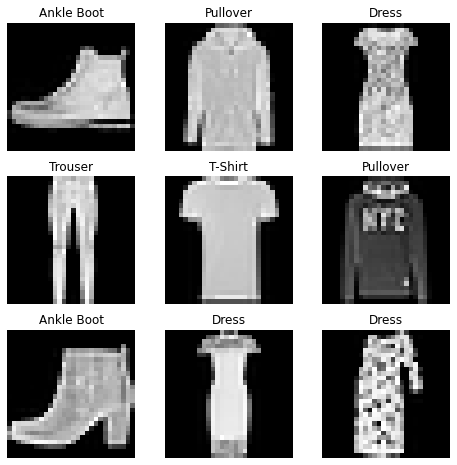

In [ ]:
# Iterating and visualizing the dataset

labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}

figure = plt.figure(figsize = (8,8))
cols, rows = 3, 3
for i in range(1, cols*rows + 1):
    sample_idx = torch.randint(len(training_data), size = (1, )).item() 
    # The ".item()" allows to access the value in the tensor, and not the tensor itself
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap = "gray")
plt.show()

Creating a custom DataSet for your files 
A custom Dataset class must have 3 functions: \__init__, \__len__ & \__getitem__.
In the example below, the FashionMNIST images are stored in a directory img_dir, and their labels are stored separately in a CSV file annotations_file

In [ ]:
import os 
import pandas as pd 
from torchvision.io import read_image

class CustoImageDataset(Dataset):
    
    def __init__(self, annotation_file, img_dir, transformation = None, target_transform = None):
        self.img_labels = pd.read_csv(annotation_file)
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform
    
    def __len__(self):
        return len(self.img_labels)
    
    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
        image = read_image(img_path)
        label = self.img_labels.iloc[idx, 1]
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image, label

In [ ]:
# Preparing your data for training with data loaders

from torch.utils.data import DataLoader

train_dataloader = DataLoader(training_data, batch_size = 64, shuffle = True)
    # shuffle = True implies that after iterating over all batches, the data is shuffled
test_dataloader = DataLoader(test_data, batch_size = 64, shuffle = True)

Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])


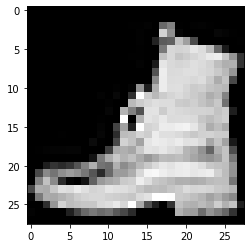

Label: 9


In [ ]:
#Iterate through the data loader

train_features, train_labels = next(iter(train_dataloader)) # On transforme en itérable et on itère dessus via next
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap = "gray")
plt.show()
print(f"Label: {label}")

### 3 - Transforms

* transform allows to modify the features
* target_transform allows to modify the labels

In [ ]:
import torch
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda

ds = datasets.FashionMNIST(
    root = "data",
    train = True,
    download = True,
    transform = ToTensor(), # Convers a PIL image or NumPy ndarray into a FloatTensor, and scale the image's pixel intensity
                            #values in the range [0.,1.]
    target_transform = Lambda(lambda y: torch.zeros(10, dtype = torch.float).scatter_(dim0, torch.tensor(y), value = 1))
    # Lambda allows to apply a lambad function. Here we create a tensor of length 10 (the number of labels) and create a 1
    # on the index given by the label y 
)

### 4 - Build the model / neural network

A neural network is a module consisting of ther modules = layers.
Here, we are going to build a nn that classifies image in the FashionMNIST dataset

In [ ]:
import os 
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [ ]:
# Switch to GPU if cuda is available (not the case on my computer):
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f'Using {device} device')

Using cpu device


In [ ]:
# Define the class

# We subclass nn.Module 



class NeuralNetwork(nn.Module): # We subclass nn.Module
    def __init__(self): 
        # super() gives access to the methods of the class from with NeuralNetwork is created,
        # ie inherits the methods of the nn.Module class
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),)
    
    def forward(self, x): # Operations on input dat
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits
        

In [ ]:
# Creation of an instance of NeuralNetwork

model = NeuralNetwork().to(device)
print(model)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


In [ ]:
# Calling the model on data

X = torch.rand(1, 28, 28, device = device) 
logits = model(X) # Do not call model.forward directly !
                  # This returns a 10-dimensionnal tensor with raw predicted values for each class
pred_probab = nn.Softmax(dim=1)(logits) # We get the prediction probabilities by using a softmax layer
y_pred = pred_probab.argmax(1)
print(f"Predicted class: {y_pred}")

Predicted class: tensor([9])


**Model layers**

In [ ]:
# Input

input_image = torch.rand(3, 28, 28) #Mini-batch of 3 random images of dim 28*28
print(input_image.size())

torch.Size([3, 28, 28])


In [ ]:
# nn.Flatten
# converts each 28*28 image in an array of 784 pixel values (the minibatch dimension at dim = 0 is maintained)

flatten = nn.Flatten()
flat_image = flatten(input_image)
print(flat_image.size())

torch.Size([3, 784])


In [ ]:
# nn.Linear
# Applies a linear transformation on the inputs using its stored weights and biases

layer1 = nn.Linear(in_features = 28*28, out_features = 20) # Takes has input 28*28 and outputs an object of dim 20
hidden1 = layer1(flat_image)
print(hidden1.size())

torch.Size([3, 20])


In [ ]:
# nn.ReLU
# Activation layer that introdces non linearity
# ReLu(x) = max(0,x), stands for Rectifier Linear Unit

print(f"Before ReLU: {hidden1}\n\n")
hidden1 = nn.ReLU()(hidden1)
print(f"After RELU: {hidden1}\n\n")

Before ReLU: tensor([[-0.0393, -0.6123, -0.6012,  0.4493, -0.0192,  0.5085,  0.0100,  0.4097,
         -0.6208,  0.0341, -0.1690, -0.2721,  0.4215, -0.1225, -0.0290, -0.4692,
         -0.2465,  0.3029, -0.1585,  0.1096],
        [ 0.0423, -0.5368, -0.7528,  0.4015, -0.0536,  0.7357, -0.1675, -0.1598,
         -0.2756, -0.1317, -0.5756, -0.0113,  0.2121,  0.1770,  0.2252, -0.4787,
          0.0968, -0.1595, -0.3692,  0.1673],
        [-0.1128, -0.1108, -0.5327,  0.1657,  0.0355,  0.4780, -0.1684, -0.0486,
         -0.3917, -0.1133, -0.3070, -0.4737,  0.3702,  0.2709,  0.1793, -0.1436,
         -0.1688,  0.1335, -0.2589, -0.2218]], grad_fn=<AddmmBackward0>)


After RELU: tensor([[0.0000, 0.0000, 0.0000, 0.4493, 0.0000, 0.5085, 0.0100, 0.4097, 0.0000,
         0.0341, 0.0000, 0.0000, 0.4215, 0.0000, 0.0000, 0.0000, 0.0000, 0.3029,
         0.0000, 0.1096],
        [0.0423, 0.0000, 0.0000, 0.4015, 0.0000, 0.7357, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.2121, 0.1770, 0.22

In [ ]:
# nn.Sequential
# It is an ordered container of modules, the data will pass through all the modules in the defined order

# It can be used to create a quick network like in this example with seq_modules:

seq_modules = nn.Sequential(
    flatten,
    layer1,
    nn.ReLU(),
    nn.Linear(20,10)
)

input_image = torch.rand(3, 28, 28)
logits = seq_modules(input_image)

In [ ]:
# nn.Softmax
# Allows to scale the logits (real numbers) in the range [0., 1.], representing the model's predicted probability for each class
# the "dim" parameter indicates the dimension along which the values must sum to 1

softmax = nn.Softmax(dim = 1)
pred_probab = softmax(logits)

In [ ]:
# Model parameters
# By subclassing nn.Module, we automatically track the values of all fields inside the model object
# We can access them with either model.parameters or model.names_parameters and see their size and values

print("Model structure: ", model, "\n\n")
for name, param in model.named_parameters():
    print(f"Layer: {name} | Size: {param.size()} | Values: {param[:2]} \n")

Model structure:  NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
) 


Layer: linear_relu_stack.0.weight | Size: torch.Size([512, 784]) | Values: tensor([[ 0.0240,  0.0276,  0.0104,  ...,  0.0120, -0.0350,  0.0018],
        [ 0.0260, -0.0131, -0.0290,  ..., -0.0091,  0.0169,  0.0028]],
       grad_fn=<SliceBackward0>) 

Layer: linear_relu_stack.0.bias | Size: torch.Size([512]) | Values: tensor([0.0168, 0.0025], grad_fn=<SliceBackward0>) 

Layer: linear_relu_stack.2.weight | Size: torch.Size([512, 512]) | Values: tensor([[-0.0268, -0.0191,  0.0242,  ..., -0.0422,  0.0220,  0.0264],
        [ 0.0376,  0.0363,  0.0365,  ...,  0.0334, -0.0247, -0.0055]],
       grad_fn=<SliceBackward0>) 

Layer: linear_relu_stack.2.bias | Siz

### 5 - Automatic differentiation

Backpropagation adjust model weights according to the gradient of the loss function with respect to the given parameter, using the chain rule. Torch.autograd allows the automatic computation of gradient for any computational graph

In [ ]:
# Simple example

import torch

x = torch.ones(5) # input tensor
y = torch.zeros(3) #expected output
w = torch.randn(5, 3, requires_grad = True) # Random values from a normal 0 1
b = torch.randn(3, requires_grad = True) # requires_grad allows to compute the gradient of the loss during the backpropagation
z = torch.matmul(x, w) + b
loss = torch.nn.functional.binary_cross_entropy_with_logits(z, y)

In [ ]:
# Tensors, functions and computational graphs

print('Gradient function for z = ', z.grad_fn)
print('Gradient function for loss =', loss.grad_fn)

Gradient function for z =  <AddBackward0 object at 0x0000023D515D7408>
Gradient function for loss = <BinaryCrossEntropyWithLogitsBackward0 object at 0x0000023D515CFAC8>


In [ ]:
# Computing gradients

loss.backward() # Computation of the derivatives
print(w.grad)
print(b.grad)

tensor([[0.1416, 0.0020, 0.2311],
        [0.1416, 0.0020, 0.2311],
        [0.1416, 0.0020, 0.2311],
        [0.1416, 0.0020, 0.2311],
        [0.1416, 0.0020, 0.2311]])
tensor([0.1416, 0.0020, 0.2311])


In [ ]:
# Disabling gradient tracking
# All tensors with requires_grad = True are tracking their computational history and support gradient computation
# In some cases - for example if we only apply the learned model to some data - we only want the forward computation
# It can also be useful if you want to freeze some parameters in the network or to speed up computations

z = torch.matmul(x, w)+b
print(z.requires_grad)

with torch.no_grad(): # Disables the history tracking, does not support gradient computation
    z = torch.matmul(x, w) + b 
print(z.requires_grad)

True
False


In [ ]:
# Applying the "detach" method to the tensor allows to have the same result
z = torch.matmul(x, w) + b
z_det = z.detach()
print(z_det.requires_grad)

False


Note that in pytorch, DAGs are dynamic, it is recreated from scratch after each .backward() call. Its leaves are the input tensors and its roots the output tensors. The chain rules allows to propagate the derivative all the way to leaf tensors.

#### Tensor gradients and jacobian products

In many cases, we have a scalar loss function but in some cases it might return a vector. In this case, Pytorch allows to compute the Jacobian product instead of the actual gradient. A gradient of the vector y with the respect to the vector x is the jacobian matrix, and pytorch computes the jacobian product v.transpose()\*J for a given input vector v. It is done by calling backward with v as an argument. The size of v should be the same as the size of the original tensor, with respect to which we want to compute the produt:

In [ ]:
inp = torch.eye(5, requires_grad = True)
out = (inp+1).pow(2)
out.backward(torch.ones_like(inp), retain_graph = True)
print("First call\n", inp.grad)
out.backward(torch.ones_like(inp), retain_graph = True)
print("Second call\n", inp.grad)
inp.grad.zero_()
out.backward(torch.ones_like(inp), retain_graph = True)
print("\nCall after zeroing gradient\n", inp.grad)

# When we call backward for the second time, the value of the gradient is added to the previous one.
# We need to zero the grad property before in order to compute the proper gradient

# Before this cell, we were calling backward without arguments, which is equivalent to "backward(torch.tensor(1.0))"

First call
 tensor([[4., 2., 2., 2., 2.],
        [2., 4., 2., 2., 2.],
        [2., 2., 4., 2., 2.],
        [2., 2., 2., 4., 2.],
        [2., 2., 2., 2., 4.]])
Second call
 tensor([[8., 4., 4., 4., 4.],
        [4., 8., 4., 4., 4.],
        [4., 4., 8., 4., 4.],
        [4., 4., 4., 8., 4.],
        [4., 4., 4., 4., 8.]])

Call after zeroing gradient
 tensor([[4., 2., 2., 2., 2.],
        [2., 4., 2., 2., 2.],
        [2., 2., 4., 2., 2.],
        [2., 2., 2., 4., 2.],
        [2., 2., 2., 2., 4.]])
tensor([[4., 1., 1., 1., 1.],
        [1., 4., 1., 1., 1.],
        [1., 1., 4., 1., 1.],
        [1., 1., 1., 4., 1.],
        [1., 1., 1., 1., 4.]], grad_fn=<PowBackward0>)


### 6 - Optimization loop

In [ ]:
# Code of the previous sections

import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda

training_data = datasets.FashionMNIST(
    root = "data",
    train = True,
    download = True,
    transform = ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

train_dataloader = DataLoader(training_data, batch_size = 64)
test_dataloader = DataLoader(test_data, batch_size = 64)

class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10)
        )
        
    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits
    
model = NeuralNetwork()

The hyperparameters are:
* Number of epochs = number of time to iterate over the dataset
* Batch size = the number of data samples propagated through the network before the parameters are updated
* Leraning rate = how much to update models parameters at each batch/epoch

In [ ]:
# Hyperparameters

learning_rate = 1e-3
batch_size = 64
epochs = 5

Optimization loop, which includes at each epoch a train loop & a validation / test loop

Loss function measures the degree of dissimilarity of obtained result to the target value, and it is the loss function that we want to minimize during training. We can use MSE (regression), Negative log likelihood (classification), crossentropyloss

In [ ]:
# Initialize the loss function

loss_fn = nn.CrossEntropyLoss()

# Optimizer 
# Here we use stochastic gradient descent or SGD

optimizer= torch.optim.SGD(model.parameters(), lr = learning_rate)

There are 3 steps of optimization in the training loop:
* Call **optimizer.zero_grad()** to set all the gradientes to zero
* Call **loss.backward()** to backpropagate the the prediction loss (with respect to all parameters)
* Call **optimier.step()** to adjust the parameters by the gradients collected in the backward pass

In [ ]:
# Full implementation

def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    for batch, (X, y) in enumerate(dataloader):
        # Compute prediction loss
        pred = model(X)
        loss = loss_fn(pred, y)
    
        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if batch % 100 == 0:
            loss, current = loss.item(), batch * len(X)
            print(f"loss: {loss:>7f} [{current:>5d}/{size:>5d}]")

def test_loop(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0
    
    with torch.no_grad():
        for X, y in dataloader:
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            # If I understood correctly pred gives us, for each of the 10 possible predictions, a probability 
            # (and this for each dataentry)
            # Then pred.argmax(1) ie along axis 1, provides the prediction of the model (the highest probability)
            # Finally, we test whether this prediction is correct (==y)
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
            print(pred)
    
    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg Loss {test_loss:>8f} \n")
    
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)
epochs = 10

for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------")
    train_loop(train_dataloader, model, loss_fn, optimizer)
    test_loop(test_dataloader, model, loss_fn)
print("Done !")

Epoch 1
-------------------------
loss: 0.750473 [    0/60000]
loss: 0.832453 [ 6400/60000]
loss: 0.603472 [12800/60000]
loss: 0.827322 [19200/60000]
loss: 0.727883 [25600/60000]
loss: 0.716214 [32000/60000]
loss: 0.808732 [38400/60000]
loss: 0.777186 [44800/60000]
loss: 0.781601 [51200/60000]
loss: 0.739131 [57600/60000]
tensor([[-4.1185e+00, -4.9023e+00, -3.1009e+00, -2.5390e+00, -2.1780e+00,
          5.2645e+00, -2.5831e+00,  4.8918e+00,  2.5941e+00,  5.7545e+00],
        [ 2.1960e+00, -4.5349e+00,  7.9712e+00, -5.8070e-01,  5.7303e+00,
         -4.6051e+00,  6.2693e+00, -1.0256e+01,  2.2518e+00, -6.8373e+00],
        [ 1.4245e+00,  9.6259e+00, -4.1148e-01,  5.0135e+00,  2.1851e+00,
         -4.0169e+00,  3.4408e-01, -5.1883e+00, -4.3100e+00, -4.6761e+00],
        [ 8.2338e-01,  7.6253e+00, -7.4340e-01,  4.0746e+00,  1.2023e+00,
         -2.6321e+00, -1.2993e-01, -3.3916e+00, -3.5480e+00, -3.0407e+00],
        [ 2.5254e+00, -2.0097e+00,  2.6303e+00,  6.8590e-01,  1.6212e+00,
      

tensor([[ -4.1795,  -5.4218,  -3.6721,  -1.9890,  -2.2145,   5.4007,  -2.5365,
           3.1882,   2.8780,   7.0928],
        [  2.5517,  -0.4267,   0.2305,   1.9529,   0.2247,  -1.2682,   1.7064,
          -3.2928,   0.1945,  -2.5474],
        [  1.2121,  -1.9827,   0.7447,   0.9178,   0.8619,  -0.8713,   1.7667,
          -2.7946,   0.9782,  -1.8218],
        [ -0.6784,  -6.0964,   2.0605,  -0.0584,   3.7299,  -1.3381,   3.1227,
          -5.3703,   5.2392,  -3.5237],
        [ -3.1737,  -3.1392,  -2.4525,  -1.6735,  -1.6616,   4.2736,  -2.0825,
           4.9163,   1.7295,   2.4846],
        [  4.0992,   0.2842,   1.9159,   2.5734,   1.7164,  -3.5219,   3.3802,
          -6.5430,  -0.6680,  -4.2537],
        [ -4.0696,  -3.9375,  -3.0733,  -1.8804,  -1.9067,   4.9479,  -2.6759,
           6.9623,   2.2155,   2.1805],
        [ -4.2036,  -7.1805,  -3.2150,  -3.2627,  -2.6119,   5.8743,  -2.3238,
           3.2668,   3.6697,   8.7324],
        [  3.4440,   4.6621,  -0.3651,   6.4701,

tensor([[-4.9452e+00, -4.3221e+00, -3.7006e+00, -2.1585e+00, -2.0812e+00,
          5.5608e+00, -3.2664e+00,  7.3394e+00,  2.2699e+00,  3.9356e+00],
        [ 6.3397e-01, -2.3809e+00,  6.2147e+00,  3.3048e-01,  7.0404e+00,
         -4.8932e+00,  5.3867e+00, -9.4661e+00,  1.7219e+00, -7.2849e+00],
        [ 1.8884e+00, -3.3180e+00,  4.5527e+00, -1.6842e-01,  3.9686e+00,
         -3.1154e+00,  4.5050e+00, -7.9939e+00,  2.3043e+00, -4.8774e+00],
        [-3.0226e+00, -2.4658e+00, -1.8359e+00, -1.6076e+00, -1.0669e+00,
          3.6189e+00, -1.7480e+00,  4.4336e+00,  1.4147e+00,  1.4964e+00],
        [ 3.4224e-01, -2.7691e+00,  6.6249e+00, -5.5131e-02,  7.1437e+00,
         -4.7549e+00,  5.4417e+00, -9.4831e+00,  2.1120e+00, -7.3219e+00],
        [ 1.5082e-01,  7.8704e-01, -6.2590e-01,  2.0568e+00,  2.2712e-01,
         -4.1394e-01,  1.1466e-01, -8.8912e-01, -7.4684e-01, -1.0102e+00],
        [ 1.5771e+00, -2.4400e+00,  5.2279e+00,  1.0123e+00,  5.7116e+00,
         -4.6614e+00,  5.3024e+0

tensor([[ -4.3564,  -6.7240,  -3.5351,  -3.1188,  -2.8570,   6.0129,  -2.6890,
           4.3417,   3.3414,   8.4478],
        [  0.7981,  -3.9780,  -0.7787,   0.1873,  -1.5170,   1.2609,   0.6809,
          -1.9558,   1.0217,   3.2544],
        [  1.7747,  -1.1954,   4.3111,   0.7234,   3.3420,  -3.2255,   3.7728,
          -6.5372,   0.4608,  -4.7281],
        [ -1.6772,  -0.6804,   3.8281,   0.4818,   5.2882,  -2.9748,   2.6428,
          -5.9230,   0.9343,  -3.9440],
        [ -3.3985,  -2.7164,  -2.6064,  -1.3512,  -1.6455,   3.9533,  -2.3012,
           6.0686,   1.2900,   1.7476],
        [  5.6605,   1.1792,   2.5333,   2.8963,   1.2403,  -4.1707,   3.7719,
          -7.3139,  -1.3300,  -5.2944],
        [  1.8011,   6.5367,   0.2974,   3.7054,   1.8745,  -3.3290,   0.9777,
          -4.7462,  -3.1017,  -4.2105],
        [  1.1182,   3.1512,  -1.0620,   3.6059,   0.5045,  -1.5503,   0.3334,
          -2.8210,  -1.4051,  -2.1574],
        [ -3.4625,  -4.8908,  -2.5553,  -2.6342,

tensor([[ 3.3996e+00, -2.1455e+00,  6.8740e+00,  1.6662e+00,  6.0525e+00,
         -6.1533e+00,  6.5450e+00, -1.1713e+01,  1.0873e+00, -8.3381e+00],
        [ 8.5357e+00,  1.1734e+00,  2.7025e+00,  4.6909e+00,  1.2264e+00,
         -5.9245e+00,  5.1991e+00, -1.0618e+01, -1.7072e+00, -6.5769e+00],
        [-2.6194e+00, -7.1037e+00,  4.5185e-01, -2.3946e+00,  1.4539e+00,
          1.9601e+00,  9.2809e-01, -1.4643e+00,  5.6394e+00,  6.7030e-01],
        [-2.5109e+00, -2.7472e+00, -2.0655e+00, -1.1786e+00, -1.2755e+00,
          3.3962e+00, -1.6062e+00,  3.6162e+00,  1.3879e+00,  2.2369e+00],
        [-5.8231e+00, -7.7210e+00, -4.3481e+00, -3.9268e+00, -3.1222e+00,
          7.4180e+00, -3.6160e+00,  7.3024e+00,  4.1817e+00,  8.0934e+00],
        [ 5.1079e+00,  4.1507e-01,  2.1651e+00,  2.9565e+00,  1.6855e+00,
         -4.0503e+00,  3.8297e+00, -7.6626e+00, -8.1750e-01, -4.7898e+00],
        [ 3.6247e-01,  1.9999e+00, -7.2276e-01,  2.6349e+00,  3.2527e-01,
         -7.9136e-01,  1.2329e-0

tensor([[ 1.9434e+00,  9.7718e+00, -4.5570e-02,  5.3109e+00,  2.3639e+00,
         -4.5643e+00,  7.2538e-01, -5.9282e+00, -4.3857e+00, -5.4407e+00],
        [-2.5945e+00, -6.4450e+00,  8.6916e-01, -1.4282e+00,  2.5885e+00,
          8.9235e-01,  1.4881e+00, -2.3899e+00,  5.7343e+00, -1.3418e+00],
        [-4.0693e+00, -6.8784e+00, -3.3104e+00, -3.2561e+00, -2.8036e+00,
          5.8521e+00, -2.4870e+00,  3.5894e+00,  3.5692e+00,  8.6339e+00],
        [ 1.5206e+00, -2.3119e-01, -9.5884e-01,  2.9471e+00, -4.5445e-01,
         -6.5396e-01,  6.4332e-01, -2.2337e+00, -1.6968e-01, -1.1165e+00],
        [-3.8345e+00, -3.7022e+00, -2.3700e+00, -2.0959e+00, -1.2174e+00,
          4.4543e+00, -2.1953e+00,  5.7791e+00,  2.4364e+00,  1.5634e+00],
        [-3.0392e+00, -4.1103e+00, -2.5235e+00, -2.1964e+00, -2.0673e+00,
          4.3745e+00, -2.0320e+00,  3.8635e+00,  1.9139e+00,  5.0085e+00],
        [-4.5671e+00, -3.9213e+00, -3.3052e+00, -2.0474e+00, -1.9463e+00,
          5.2123e+00, -2.9523e+0

tensor([[-2.6671e+00, -2.5238e+00, -1.9531e+00, -1.1651e+00, -1.1999e+00,
          3.3808e+00, -1.6615e+00,  4.1968e+00,  1.3771e+00,  1.4670e+00],
        [ 9.7140e-01,  9.3638e+00, -7.3542e-01,  4.7667e+00,  1.8578e+00,
         -3.4618e+00, -8.9179e-02, -4.2648e+00, -4.3041e+00, -3.9767e+00],
        [ 4.4335e-01,  3.2175e-01, -5.3756e-01,  1.3834e+00, -1.6862e-02,
         -3.5451e-02,  2.2883e-01, -1.0783e+00, -3.4014e-02, -9.6583e-01],
        [ 5.7743e+00, -3.3141e-02,  2.7109e+00,  3.6850e+00,  2.2538e+00,
         -5.0177e+00,  4.7044e+00, -9.1106e+00, -3.5158e-01, -6.2190e+00],
        [ 6.7834e+00,  3.4851e+00,  1.5175e+00,  6.4560e+00,  1.5345e+00,
         -5.9735e+00,  3.9772e+00, -9.6815e+00, -2.7664e+00, -6.3469e+00],
        [ 7.9883e+00, -1.0599e+00,  3.1468e+00,  3.2776e+00,  1.6455e+00,
         -5.4582e+00,  5.5284e+00, -1.0793e+01, -1.0786e-01, -6.1597e+00],
        [-3.5979e+00, -3.7162e+00, -1.8539e+00, -2.1029e+00, -7.9262e-01,
          3.8863e+00, -1.7248e+0

tensor([[ 7.3638e-01, -1.5184e+00,  4.3098e+00, -4.8105e-01,  3.3030e+00,
         -2.3250e+00,  3.1341e+00, -5.2125e+00,  7.2513e-01, -3.9368e+00],
        [ 1.1170e+00, -3.8013e+00,  5.9159e+00, -3.4706e-01,  5.5327e+00,
         -3.9284e+00,  5.2243e+00, -8.9259e+00,  2.5510e+00, -5.9030e+00],
        [ 1.3112e+00,  7.7040e+00, -4.8393e-01,  5.0142e+00,  1.6455e+00,
         -3.4515e+00,  3.2529e-01, -4.3153e+00, -3.9054e+00, -3.7980e+00],
        [-4.5614e+00, -6.8084e+00, -4.0077e+00, -3.0130e+00, -3.3151e+00,
          6.8352e+00, -3.0190e+00,  4.5417e+00,  3.2427e+00,  8.8385e+00],
        [-3.2320e+00, -2.7356e+00, -2.3070e+00, -1.3664e+00, -1.0533e+00,
          3.7308e+00, -1.9187e+00,  4.6740e+00,  1.7561e+00,  1.4303e+00],
        [ 1.7159e-01, -6.2263e+00,  3.2977e+00, -1.7435e+00,  3.4474e+00,
         -1.3451e+00,  3.4844e+00, -5.7172e+00,  5.0494e+00, -3.0016e+00],
        [ 8.0193e-01,  7.0768e+00, -6.1941e-01,  3.7151e+00,  1.2379e+00,
         -2.4771e+00, -5.5519e-0

tensor([[ 8.0830e-01, -3.2750e+00,  6.0057e+00,  5.4174e-01,  6.5516e+00,
         -4.5775e+00,  5.4910e+00, -9.8411e+00,  2.5697e+00, -6.9751e+00],
        [ 2.1371e+00, -2.1455e+00,  4.3326e+00,  3.4787e-01,  3.5761e+00,
         -3.2445e+00,  4.1043e+00, -6.8504e+00,  1.6365e+00, -5.7108e+00],
        [ 3.9272e-01, -8.5890e-01,  2.0904e+00,  1.9987e-01,  2.0175e+00,
         -1.2685e+00,  2.0062e+00, -3.2979e+00,  5.1599e-01, -2.7062e+00],
        [-4.3883e+00, -4.9532e+00, -3.4480e+00, -2.5575e+00, -2.3832e+00,
          5.5740e+00, -2.8581e+00,  6.0519e+00,  2.4297e+00,  5.3932e+00],
        [-3.7001e+00, -6.5457e+00, -3.1408e+00, -3.1882e+00, -2.8786e+00,
          5.7863e+00, -2.3759e+00,  3.6958e+00,  3.1489e+00,  8.1842e+00],
        [ 1.3704e+00, -1.9934e+00,  4.3129e+00,  5.5633e-01,  4.3214e+00,
         -3.4462e+00,  4.3127e+00, -7.5483e+00,  1.2257e+00, -5.1171e+00],
        [ 7.3837e-01,  5.3587e-01,  5.3606e+00,  7.9722e-01,  6.7037e+00,
         -5.2784e+00,  4.4231e+0

tensor([[ 1.4225e+00,  3.2805e+00, -1.1485e+00,  4.5500e+00,  5.3035e-01,
         -2.0209e+00,  4.4574e-01, -3.2896e+00, -1.7673e+00, -2.4722e+00],
        [-2.4494e+00, -2.3127e+00, -1.6882e+00, -1.0479e+00, -1.0399e+00,
          3.1492e+00, -1.4424e+00,  3.7971e+00,  1.3410e+00,  9.2849e-01],
        [-2.9078e-01, -3.2524e+00,  5.1568e+00, -3.0415e-01,  6.2436e+00,
         -3.5850e+00,  4.4938e+00, -8.4817e+00,  2.6668e+00, -5.3299e+00],
        [ 1.9454e+00, -2.9654e+00,  5.5154e+00,  2.6469e-01,  5.1166e+00,
         -4.1753e+00,  5.1679e+00, -9.0455e+00,  2.0118e+00, -6.2833e+00],
        [-5.1614e+00, -7.5363e+00, -4.0842e+00, -3.8167e+00, -3.0817e+00,
          6.8477e+00, -3.2317e+00,  5.8877e+00,  3.7660e+00,  8.9682e+00],
        [-2.4560e+00, -6.9806e+00,  1.1988e+00, -2.8398e+00,  2.1811e+00,
          1.4320e+00,  1.3414e+00, -2.3499e+00,  5.7630e+00,  1.3007e-01],
        [-1.7955e+00, -4.6650e+00, -1.8789e+00, -1.3829e+00, -1.9139e+00,
          3.5683e+00, -1.0104e+0

tensor([[ 1.7819e+00, -1.5997e+00,  2.7852e+00,  2.4942e+00,  4.8951e+00,
         -4.3083e+00,  4.2020e+00, -8.5756e+00,  1.8765e+00, -6.1091e+00],
        [-2.7724e+00, -2.9659e+00, -2.2153e+00, -1.3641e+00, -1.4233e+00,
          3.6469e+00, -1.7417e+00,  3.9649e+00,  1.6766e+00,  2.4014e+00],
        [-5.5530e+00, -7.5393e+00, -4.4686e+00, -3.9790e+00, -3.3118e+00,
          7.4273e+00, -3.6434e+00,  6.5497e+00,  3.9569e+00,  9.1510e+00],
        [-3.8157e+00, -6.2114e+00, -3.0553e+00, -3.1122e+00, -2.5946e+00,
          5.6381e+00, -2.3874e+00,  4.0556e+00,  3.1988e+00,  7.3029e+00],
        [-3.9809e+00, -5.5712e+00, -3.2049e+00, -2.4355e+00, -2.1211e+00,
          5.2255e+00, -2.2591e+00,  3.7938e+00,  3.2771e+00,  6.1568e+00],
        [ 4.1625e+00,  2.8646e+00,  1.4861e+00,  5.2504e+00,  2.9803e+00,
         -5.3754e+00,  3.4487e+00, -8.9923e+00, -1.6721e+00, -5.5757e+00],
        [ 1.2335e+00,  9.5305e+00, -1.0165e+00,  5.3242e+00,  1.8301e+00,
         -3.7271e+00, -4.2279e-0

tensor([[ 1.1787e+00, -9.9987e-01,  2.6476e+00,  1.9381e-01,  1.8716e+00,
         -1.5831e+00,  2.3699e+00, -3.9935e+00,  3.6688e-01, -2.8380e+00],
        [ 1.2161e+00, -1.1820e+00,  2.1114e+00,  6.9022e-01,  2.5163e+00,
         -1.9912e+00,  2.6119e+00, -4.8240e+00,  8.5017e-01, -3.2817e+00],
        [ 7.6031e-02, -2.3393e+00,  5.7451e+00,  1.0262e+00,  7.1924e+00,
         -5.0021e+00,  5.3284e+00, -9.9645e+00,  2.1315e+00, -7.2755e+00],
        [ 1.7350e+00, -2.3153e+00,  5.2793e+00,  1.4436e+00,  6.5136e+00,
         -5.3148e+00,  5.6324e+00, -1.0809e+01,  1.8565e+00, -7.0611e+00],
        [ 3.3962e+00, -5.8387e-01,  1.8547e+00,  1.3306e+00,  9.9813e-01,
         -2.1798e+00,  2.7055e+00, -4.7465e+00, -6.8338e-02, -3.6333e+00],
        [ 2.8391e+00,  7.4756e+00,  3.9431e-01,  4.5208e+00,  2.5909e+00,
         -4.6534e+00,  1.6123e+00, -6.5224e+00, -3.4268e+00, -5.4379e+00],
        [-2.8109e+00, -3.6354e+00, -1.9028e+00, -2.0360e+00, -1.5230e+00,
          4.1888e+00, -1.5891e+0

tensor([[ 7.2876e-01,  8.2921e+00, -6.0754e-01,  4.9831e+00,  1.8510e+00,
         -3.3585e+00, -6.5800e-03, -4.0154e+00, -4.0251e+00, -3.7417e+00],
        [ 2.7033e+00, -3.9762e+00,  6.9751e+00,  4.4055e-01,  6.4337e+00,
         -5.5126e+00,  6.7304e+00, -1.1749e+01,  2.6179e+00, -7.8233e+00],
        [ 7.8180e-01, -1.4089e+00,  5.4491e+00, -3.9085e-01,  4.9375e+00,
         -3.5127e+00,  4.0560e+00, -7.1976e+00,  8.5350e-01, -5.2689e+00],
        [-1.2853e+00, -1.3158e+00, -9.8348e-01, -4.2831e-01, -6.6347e-01,
          1.9876e+00, -6.9928e-01,  1.8347e+00,  6.1933e-01,  4.9213e-01],
        [-4.2756e+00, -6.7776e+00, -3.2962e+00, -3.3987e+00, -2.5691e+00,
          6.0376e+00, -2.5290e+00,  4.2899e+00,  3.8273e+00,  7.4671e+00],
        [ 1.7789e+00, -2.1771e+00,  8.1453e+00,  3.0537e-01,  7.7017e+00,
         -6.2934e+00,  6.4124e+00, -1.1589e+01,  1.3085e+00, -8.5141e+00],
        [-2.4047e+00, -2.1075e+00, -1.9017e+00, -1.2573e+00, -1.3235e+00,
          3.3901e+00, -1.6132e+0

tensor([[ 1.3505e+00,  4.0483e+00, -3.0928e-01,  4.5762e+00,  1.5350e+00,
         -2.8214e+00,  8.6096e-01, -3.9773e+00, -2.4804e+00, -3.1667e+00],
        [-5.1140e+00, -7.3156e+00, -1.8947e+00, -3.1883e+00,  9.0505e-02,
          4.7230e+00, -1.3101e+00,  2.7373e+00,  6.2136e+00,  2.8372e+00],
        [ 2.0513e+00, -2.9034e+00,  4.9255e+00, -1.9603e-01,  2.9549e+00,
         -2.6301e+00,  4.0720e+00, -7.1901e+00,  1.4255e+00, -4.0712e+00],
        [-4.5921e+00, -6.6323e+00, -3.5108e+00, -3.1691e+00, -2.5203e+00,
          5.9303e+00, -2.6625e+00,  4.3989e+00,  3.4280e+00,  8.1096e+00],
        [ 7.9116e+00, -4.5292e-01,  2.8917e+00,  3.4096e+00,  8.1556e-01,
         -4.9501e+00,  4.9859e+00, -9.4232e+00, -7.5505e-01, -5.8354e+00],
        [ 3.8275e+00,  8.8592e-01,  1.7493e+00,  1.8892e+00,  7.4511e-01,
         -2.5717e+00,  2.5740e+00, -4.8955e+00, -1.2362e+00, -3.3524e+00],
        [-2.6853e+00, -2.9847e+00, -2.2804e+00, -1.5490e+00, -1.7108e+00,
          3.8245e+00, -1.8660e+0

tensor([[  1.4143,  -3.3088,   5.6295,   0.6074,   6.1357,  -4.6214,   5.6638,
         -10.2317,   2.3446,  -6.6028],
        [  2.6729,  -3.5030,   6.4129,   0.0410,   5.1961,  -4.5480,   5.8425,
         -10.1773,   2.1730,  -6.5532],
        [ -0.7234,  -2.2428,   2.1945,  -1.1145,   1.6407,   0.1211,   1.4073,
          -2.2405,   1.4687,  -1.4234],
        [ -1.0736,  -3.2311,  -1.8417,  -1.4016,  -2.4286,   3.7833,  -1.1589,
           2.2380,   1.4355,   3.3683],
        [ -1.9300,  -6.0804,  -1.7987,  -1.6323,  -2.0885,   3.8510,  -0.8359,
          -0.0786,   2.2937,   6.9648],
        [ -3.1344,  -9.4226,   1.2071,  -3.3219,   2.1939,   2.0342,   1.5828,
          -2.7383,   7.9679,   0.5139],
        [ -4.8405,  -5.1293,  -3.7475,  -2.6599,  -2.5096,   5.9551,  -3.1815,
           6.9524,   2.4003,   5.5135],
        [ -2.8950,  -4.0346,  -2.5658,  -2.1103,  -2.0267,   4.3270,  -2.0153,
           4.0502,   1.7494,   4.6013],
        [  2.0012,   2.0586,   0.3243,   2.6658,

tensor([[ 6.6117e-01,  2.2438e+00, -2.8812e+00,  5.4342e+00, -4.8958e-01,
         -9.9970e-01, -5.1118e-01, -2.2947e+00, -1.1906e+00, -7.6927e-01],
        [ 3.5989e+00,  3.0717e+00, -7.3656e-01,  6.4820e+00,  1.2923e+00,
         -3.8737e+00,  1.8867e+00, -6.5803e+00, -1.3695e+00, -4.8542e+00],
        [ 3.4000e+00,  1.0912e+00,  3.2816e+00,  3.4072e+00,  4.3709e+00,
         -5.3146e+00,  4.4186e+00, -9.0474e+00, -5.9303e-01, -6.8882e+00],
        [-3.3329e-01, -2.2430e+00,  3.1619e+00, -6.1322e-01,  3.3730e+00,
         -1.5097e+00,  2.5556e+00, -4.1456e+00,  1.6859e+00, -3.2614e+00],
        [ 3.0157e+00,  3.2109e-01, -9.7574e-01,  4.8830e+00,  4.8707e-01,
         -2.5199e+00,  1.7334e+00, -5.3133e+00, -7.2389e-02, -2.9891e+00],
        [-4.9814e+00, -8.4371e+00, -4.2255e+00, -4.2070e+00, -3.7580e+00,
          7.6671e+00, -3.2676e+00,  5.1654e+00,  4.3873e+00,  1.0388e+01],
        [-5.1574e+00, -7.1062e+00, -4.1847e+00, -3.7771e+00, -3.2137e+00,
          6.9796e+00, -3.3772e+0

tensor([[  2.8021,   8.9775,   0.2720,   5.2744,   2.6269,  -4.9976,   1.3750,
          -6.7259,  -3.9813,  -6.1115],
        [ -2.1850,  -7.9009,  -3.2830,  -2.2254,  -3.4913,   5.4224,  -1.3712,
           1.1414,   3.6453,   8.6735],
        [  2.0406,   0.7261,   0.7313,   2.9915,   1.6148,  -2.4934,   2.0130,
          -4.3793,  -0.5372,  -3.6412],
        [ -3.5235,  -3.6976,  -2.6633,  -2.0652,  -1.8884,   4.4866,  -2.2855,
           4.9105,   1.6754,   4.1081],
        [  1.6159,   4.6869,  -0.0452,   3.5159,   1.1354,  -2.5080,   0.7843,
          -3.7385,  -2.2945,  -3.4340],
        [  3.5641,   1.0897,   1.5555,   1.7097,   0.6797,  -2.3663,   2.3253,
          -4.5113,  -1.2209,  -3.2278],
        [  2.5889,   2.4907,  -0.6696,   5.5106,   1.4515,  -3.2565,   1.6066,
          -6.0022,  -1.3277,  -3.4426],
        [  1.1418,  -0.1939,   3.8497,   0.2075,   4.1804,  -3.2183,   3.4088,
          -6.0203,   0.1111,  -4.8620],
        [  0.3752,   0.3924,   1.8684,   0.0882,

tensor([[ -4.9981,  -6.9014,  -4.3234,  -3.6239,  -3.5273,   7.1754,  -3.5275,
           5.8782,   3.1814,   9.6477],
        [  5.0704,  -2.8451,   5.1922,   2.4048,   4.4355,  -5.8726,   6.3644,
         -11.4255,   1.4331,  -7.5976],
        [  0.8915,   2.8719,  -1.3746,   4.9444,   0.5496,  -1.8277,   0.2702,
          -2.9159,  -1.8627,  -1.9657],
        [  5.3267,   3.8564,   0.3119,   7.1475,   1.3530,  -5.1644,   2.8866,
          -8.3124,  -2.4219,  -5.9650],
        [ -0.6423,  -1.2587,   2.7184,   0.5374,   4.5846,  -2.4771,   2.7859,
          -6.1371,   1.3952,  -3.5214],
        [  1.5239,   0.4377,   0.4848,   1.0621,   0.4021,  -0.8322,   1.1518,
          -2.1565,  -0.4283,  -1.8167],
        [  1.8968,  -0.2800,   3.3414,   0.5795,   2.1339,  -2.2541,   2.8885,
          -5.0319,  -0.1252,  -3.9115],
        [  1.4652,   0.1015,   4.7727,   1.0514,   4.8092,  -4.0993,   4.0622,
          -7.4968,  -0.0973,  -5.9751],
        [  0.8480,   5.0336,  -0.3195,   2.9412,

tensor([[-6.0021e+00, -6.5011e+00, -5.0827e+00, -3.2296e+00, -3.3775e+00,
          7.4896e+00, -4.1364e+00,  8.6676e+00,  3.2074e+00,  7.2943e+00],
        [ 7.6945e+00,  1.5219e+00,  4.2528e+00,  5.1464e+00,  3.4413e+00,
         -7.4233e+00,  6.2122e+00, -1.2301e+01, -1.7766e+00, -8.6169e+00],
        [ 4.0903e+00, -3.1046e+00,  6.1086e+00,  6.2943e-01,  3.8227e+00,
         -4.7508e+00,  5.7117e+00, -1.0630e+01,  1.8410e+00, -6.0045e+00],
        [ 9.4870e-01, -4.1618e+00, -2.1393e+00,  1.9964e+00, -4.1604e-01,
          6.2837e-01,  8.2873e-01, -1.9928e+00,  3.4674e+00, -9.8213e-01],
        [ 1.2441e+00, -4.7454e-01,  1.0567e+00,  1.1757e+00,  1.8259e+00,
         -1.7088e+00,  1.9411e+00, -3.7832e+00,  3.6395e-01, -2.6886e+00],
        [-3.1078e+00, -4.9716e+00, -1.6137e+00, -2.1321e+00, -8.4297e-01,
          3.8010e+00, -1.1934e+00,  3.0936e+00,  3.6367e+00,  2.0036e+00],
        [-1.0480e-01, -2.2599e+00,  5.2660e+00,  2.0642e-01,  6.1464e+00,
         -3.9488e+00,  4.4737e+0

tensor([[  0.3169,  -2.7097,   4.4502,   0.4965,   5.7762,  -3.7918,   4.5112,
          -8.2081,   2.1114,  -5.6337],
        [ -3.7611,  -5.4761,  -2.7102,  -2.6187,  -2.0773,   4.9119,  -2.1627,
           3.6759,   2.8224,   6.4983],
        [  2.4513,  -2.0101,   7.5284,   0.6829,   6.1373,  -5.6423,   6.0595,
         -11.0189,   0.8227,  -7.4624],
        [ -2.3435,  -2.6017,  -1.6441,  -1.1755,  -0.8950,   2.9138,  -1.3100,
           3.5414,   1.5494,   1.0668],
        [  1.1580,  -2.4969,   4.5802,   0.2567,   4.6081,  -3.4340,   4.3829,
          -7.4756,   1.5909,  -5.1710],
        [ -3.5846,  -3.8061,  -2.2159,  -1.7983,  -0.8497,   4.2036,  -1.8376,
           4.7001,   2.6013,   1.2648],
        [  6.1375,  -0.1626,   3.2376,   3.7684,   2.9509,  -5.7455,   5.3333,
         -10.2561,  -0.5058,  -6.6592],
        [  0.9173,   4.4383,  -1.1525,   5.2512,   1.0417,  -2.3919,   0.2580,
          -3.4956,  -2.5247,  -2.5741],
        [  1.4474,   6.1958,  -0.0878,   3.9667,

tensor([[  2.2197,  -2.3640,   3.5708,  -1.3042,   2.1071,  -1.6694,   3.2382,
          -4.9076,   1.3280,  -3.6562],
        [  0.5670,   0.9093,  -1.0643,   2.4363,  -0.2060,  -0.3367,   0.1275,
          -1.2198,  -0.6331,  -0.8253],
        [  1.6326,   1.0868,   1.9743,   4.1884,   3.6537,  -4.1665,   3.0226,
          -7.2299,  -0.5884,  -5.2823],
        [  0.5914,   0.2335,   0.0697,   0.5232,   0.2675,  -0.1606,   0.5758,
          -1.1569,  -0.1298,  -1.0574],
        [ -3.8491,  -4.7188,  -3.4064,  -2.6170,  -2.7931,   5.5958,  -2.8459,
           5.7997,   1.8771,   6.0373],
        [  1.9401,   6.5186,   0.5501,   3.7991,   1.6931,  -3.4202,   1.0951,
          -4.6468,  -3.3127,  -4.4249],
        [  1.3226,   3.8857,  -0.8697,   4.6754,   1.0512,  -2.4227,   0.5885,
          -3.8702,  -2.1517,  -2.5337],
        [  0.6212,  -1.1223,   3.9204,   1.3803,   5.3951,  -4.0813,   4.0140,
          -8.0256,   1.4143,  -5.8050],
        [  1.7700,   0.7156,   2.1141,   3.5599,

loss: 0.805333 [ 6400/60000]
loss: 0.576373 [12800/60000]
loss: 0.805924 [19200/60000]
loss: 0.710179 [25600/60000]
loss: 0.695989 [32000/60000]
loss: 0.786554 [38400/60000]
loss: 0.763848 [44800/60000]
loss: 0.763350 [51200/60000]
loss: 0.719452 [57600/60000]
tensor([[-4.1901e+00, -5.0262e+00, -3.2905e+00, -2.5971e+00, -2.2447e+00,
          5.4551e+00, -2.7235e+00,  5.1041e+00,  2.6065e+00,  5.9687e+00],
        [ 2.3019e+00, -4.3011e+00,  8.2744e+00, -3.7449e-01,  5.8235e+00,
         -4.7530e+00,  6.5157e+00, -1.0876e+01,  2.2445e+00, -7.2883e+00],
        [ 1.3842e+00,  1.0026e+01, -2.8906e-01,  5.0065e+00,  2.3974e+00,
         -4.1820e+00,  2.8532e-01, -5.3589e+00, -4.4704e+00, -4.8227e+00],
        [ 7.7211e-01,  7.9332e+00, -6.7890e-01,  4.1058e+00,  1.3379e+00,
         -2.7264e+00, -2.0657e-01, -3.4851e+00, -3.7006e+00, -3.1079e+00],
        [ 2.6592e+00, -1.9273e+00,  2.7355e+00,  8.0634e-01,  1.5975e+00,
         -2.1913e+00,  3.3141e+00, -5.9475e+00,  8.3852e-01, -3.2658e

         -3.8404e+00,  4.3194e+00, -7.4971e+00,  1.3431e+00, -5.8375e+00]])
tensor([[ 3.9254e+00, -1.8354e+00,  4.2938e+00,  1.5790e+00,  2.6444e+00,
         -3.8294e+00,  4.6779e+00, -8.4538e+00,  8.9504e-01, -5.9158e+00],
        [ 2.0150e+00,  6.8344e+00,  2.4094e-01,  5.5268e+00,  2.3085e+00,
         -4.2666e+00,  1.1374e+00, -5.8218e+00, -3.5302e+00, -4.8594e+00],
        [-5.5108e+00, -7.3955e+00, -4.4781e+00, -3.8646e+00, -3.1735e+00,
          7.1445e+00, -3.6107e+00,  6.3373e+00,  3.6758e+00,  9.5038e+00],
        [ 2.1837e-01, -3.8031e+00,  6.5239e-01, -1.8216e-01,  1.1730e+00,
          1.6451e-01,  1.7333e+00, -3.0341e+00,  3.2009e+00, -1.5167e+00],
        [-3.0934e+00, -3.2450e+00, -2.1807e+00, -1.7400e+00, -1.2482e+00,
          4.2229e+00, -1.8209e+00,  4.1704e+00,  1.8762e+00,  2.1287e+00],
        [ 1.0103e+00,  6.5802e+00, -3.3693e-01,  4.0966e+00,  1.4070e+00,
         -2.8055e+00,  2.3643e-01, -3.6606e+00, -3.3597e+00, -3.2270e+00],
        [-2.9284e+00, -5.8825e

tensor([[-7.8831e-01, -7.6056e+00,  8.3542e-01, -2.0878e+00,  8.2314e-01,
          1.6185e+00,  1.8261e+00, -2.2658e+00,  5.8623e+00, -3.2963e-01],
        [ 1.1126e+00, -3.0833e+00,  3.3421e+00,  1.0099e+00,  4.4770e+00,
         -3.2937e+00,  4.1688e+00, -7.8058e+00,  2.4170e+00, -4.9495e+00],
        [ 9.7884e+00, -3.1176e-01,  3.9403e+00,  3.8562e+00,  1.1499e+00,
         -6.3020e+00,  6.2517e+00, -1.2246e+01, -7.9256e-01, -7.1245e+00],
        [-1.8596e+00, -6.9328e+00,  6.4606e-01, -2.5707e+00,  1.3099e+00,
          1.7461e+00,  1.1355e+00, -1.3108e+00,  5.5965e+00, -1.2620e-01],
        [-1.1003e+00, -4.1474e+00, -1.7163e+00, -9.5736e-01, -2.3778e+00,
          3.3862e+00, -9.1152e-01,  6.9082e-01,  1.1679e+00,  5.1365e+00],
        [ 4.4263e-01, -1.6684e+00,  3.4064e+00, -3.7693e-01,  2.3915e+00,
         -1.4596e+00,  2.4782e+00, -4.1612e+00,  9.0708e-01, -2.9261e+00],
        [ 1.5050e+00,  1.5326e+00,  5.7532e-01,  3.9671e+00,  3.6813e+00,
         -3.7959e+00,  2.4507e+0

tensor([[ 2.2420e+00,  4.8484e-01,  7.5110e-01,  1.5139e+00,  3.5232e-01,
         -1.3127e+00,  1.5659e+00, -3.0688e+00, -5.5280e-01, -2.2817e+00],
        [ 7.6269e-01, -1.2673e+00,  3.3301e+00, -1.6478e-01,  2.8251e+00,
         -1.9171e+00,  2.7989e+00, -4.6770e+00,  9.2247e-01, -3.7074e+00],
        [ 3.5967e+00,  6.5592e+00,  1.9194e+00,  4.9215e+00,  2.3227e+00,
         -5.1258e+00,  2.2216e+00, -6.6733e+00, -4.2547e+00, -5.9278e+00],
        [ 3.0979e+00,  6.1272e+00,  1.0916e+00,  3.9072e+00,  1.9321e+00,
         -4.1766e+00,  1.8722e+00, -5.9800e+00, -3.3770e+00, -4.9312e+00],
        [ 5.9746e-01,  8.3775e-01, -1.0183e+00,  3.1130e+00,  3.4346e-01,
         -8.5299e-01,  2.7891e-01, -2.3226e+00, -2.3026e-01, -1.4167e+00],
        [ 1.6348e+00,  8.4411e+00, -8.2744e-01,  5.9461e+00,  1.7220e+00,
         -3.8910e+00,  2.9619e-01, -5.1700e+00, -4.1060e+00, -4.1971e+00],
        [ 1.4553e+00,  2.4115e+00, -9.6755e-01,  4.1867e+00,  3.4526e-01,
         -1.6650e+00,  5.4034e-0

tensor([[  0.6814,   5.9593,  -0.8371,   3.8849,   0.9398,  -2.1229,  -0.1209,
          -2.9738,  -2.8353,  -2.4929],
        [  2.4574,   0.5268,   1.9703,   3.8160,   4.2733,  -4.5692,   3.7865,
          -8.1240,   0.1184,  -6.2697],
        [ -2.8353,  -2.7345,  -1.7350,  -1.3213,  -0.7596,   3.5384,  -1.5316,
           4.1023,   1.6641,   0.7345],
        [  0.6888,  -3.0245,   6.9063,  -0.2803,   7.4073,  -4.9347,   5.9069,
         -10.7992,   2.6733,  -7.4458],
        [ -2.5206,  -3.7920,  -1.1530,  -2.2320,  -0.5525,   3.5493,  -0.8953,
           2.0655,   2.3663,   2.3033],
        [  8.0594,   0.4943,   3.6762,   3.7713,   1.4836,  -5.8163,   5.4846,
         -10.5939,  -1.2708,  -6.6570],
        [  0.8789,  -1.5855,   5.6410,   1.5449,   7.3216,  -5.4838,   5.5918,
         -10.7238,   2.1363,  -8.3097],
        [  2.1398,  -2.7660,   8.0096,   0.4761,   7.4741,  -6.1807,   6.8907,
         -12.6410,   2.1054,  -8.6406],
        [  4.3149,   6.7681,   1.7192,   4.6254,

tensor([[ 2.2644e-01,  2.3217e+00, -1.1569e+00,  3.9552e+00,  5.1114e-01,
         -1.2313e+00, -4.3734e-02, -2.1374e+00, -1.5938e+00, -1.2093e+00],
        [-9.5681e-01, -1.3447e+00, -1.1328e+00, -6.4091e-01, -1.0473e+00,
          2.2986e+00, -7.3646e-01,  1.0921e+00,  6.8666e-01,  1.6278e+00],
        [-4.8028e+00, -6.0472e+00, -3.8424e+00, -3.1122e+00, -2.4247e+00,
          6.1890e+00, -3.0565e+00,  6.2856e+00,  3.2395e+00,  6.1550e+00],
        [-3.4077e+00, -2.7664e+00, -2.6929e+00, -1.5771e+00, -1.7559e+00,
          4.2610e+00, -2.4167e+00,  6.0963e+00,  1.2717e+00,  2.0810e+00],
        [-4.2130e+00, -5.7381e+00, -4.2497e+00, -2.8467e+00, -3.3673e+00,
          6.4060e+00, -3.3055e+00,  5.5326e+00,  2.5096e+00,  8.2493e+00],
        [ 2.5636e+00, -4.1313e+00,  4.9996e+00, -3.8545e-01,  3.5798e+00,
         -3.2775e+00,  4.7541e+00, -9.1058e+00,  3.2287e+00, -4.8887e+00],
        [ 2.0968e+00,  3.7769e+00, -2.0619e-01,  4.6688e+00,  1.7008e+00,
         -3.1965e+00,  1.3220e+0

tensor([[ 6.1176e+00,  8.5471e-01,  2.9829e+00,  4.1404e+00,  1.8484e+00,
         -5.2875e+00,  4.6863e+00, -9.3582e+00, -1.2368e+00, -6.0923e+00],
        [ 1.1233e+00, -2.1725e+00,  3.1096e+00,  7.1670e-01,  3.9405e+00,
         -2.9664e+00,  3.7210e+00, -6.8430e+00,  2.2936e+00, -4.9307e+00],
        [ 1.6161e+00,  2.1067e+00, -4.0051e-01,  4.0015e+00,  1.4820e+00,
         -2.4268e+00,  1.2621e+00, -4.1990e+00, -1.0523e+00, -3.2596e+00],
        [ 8.9867e-01,  4.8307e+00, -1.3406e-01,  2.4497e+00,  1.0079e+00,
         -1.7813e+00,  2.7739e-01, -2.5924e+00, -2.2112e+00, -2.6998e+00],
        [ 7.2601e-01,  9.9026e+00, -7.4171e-01,  5.3417e+00,  2.0524e+00,
         -3.7007e+00, -2.6710e-01, -4.4123e+00, -4.5976e+00, -4.1914e+00],
        [-1.3907e+00, -2.4749e+00, -1.0887e+00, -1.1981e+00, -1.1257e+00,
          2.8323e+00, -8.0781e-01,  1.1007e+00,  1.3891e+00,  2.4586e+00],
        [ 6.9326e-01, -2.0909e+00,  6.3683e+00,  1.9031e-01,  6.5855e+00,
         -4.5497e+00,  5.3408e+0

tensor([[ -2.4629,  -3.3723,  -1.5343,  -1.5061,  -0.7652,   3.1482,  -1.1573,
           2.6243,   1.9225,   2.3037],
        [  2.0079,   2.0672,  -0.3942,   3.5155,   0.7974,  -2.0177,   1.0806,
          -3.9076,  -0.9174,  -2.6870],
        [ -5.4192,  -7.2198,  -3.6590,  -3.6832,  -2.2807,   6.5155,  -3.0334,
           5.9319,   4.0619,   7.2229],
        [  0.7783,  -1.7462,   2.8872,   0.1753,   2.1134,  -1.4077,   2.6364,
          -4.2950,   1.1623,  -3.2402],
        [  2.0828,  -0.9897,   5.2684,   0.5186,   3.9785,  -3.6296,   4.3664,
          -7.4451,   0.5357,  -6.1150],
        [  3.4655,   3.4782,   0.1921,   5.7402,   1.7301,  -4.1689,   2.1416,
          -6.6687,  -1.8201,  -5.0622],
        [ -5.5812,  -7.6814,  -3.6678,  -4.2081,  -2.6661,   7.2340,  -3.2163,
           6.3377,   4.1536,   7.9938],
        [  0.6200,   7.2506,  -1.0289,   4.8558,   1.4535,  -2.8363,  -0.1695,
          -3.4933,  -3.5786,  -3.0002],
        [  0.8306,   8.7023,  -0.5342,   4.2647,

tensor([[  1.0513,  -1.0406,   4.2575,   0.1455,   3.5033,  -2.6039,   3.3569,
          -5.7903,   0.6559,  -4.8057],
        [  1.3245,  -0.7887,   2.3827,   0.3337,   1.9697,  -1.6185,   2.5091,
          -4.0451,   0.4042,  -3.2955],
        [  1.9556,  -3.3404,   3.0507,   0.2095,   2.4331,  -2.0170,   3.6926,
          -6.4801,   2.4121,  -3.8849],
        [  0.6481,  -2.3694,   5.8359,  -0.4833,   5.9978,  -3.8861,   4.8247,
          -8.6026,   1.8142,  -6.0354],
        [  1.2882,  -6.0961,   3.7184,  -1.3717,   2.9680,  -1.5672,   4.0690,
          -6.9489,   4.7120,  -3.4579],
        [ -1.9607,  -8.2453,   0.7340,  -3.0545,   1.5177,   1.8589,   1.3593,
          -1.8993,   7.0584,  -0.0562],
        [ -4.6134,  -3.9782,  -3.7027,  -2.1480,  -2.2822,   5.5693,  -3.2557,
           7.8619,   1.8918,   3.4308],
        [ -3.7405,  -3.9125,  -2.7553,  -1.7495,  -1.3836,   4.4050,  -2.2405,
           5.2899,   2.3494,   2.5566],
        [  2.5537,   2.6334,   1.2981,   4.2260,

tensor([[ 4.1748e+00, -5.5764e-01,  4.1956e+00,  1.8301e+00,  2.5867e+00,
         -4.0703e+00,  4.4756e+00, -7.9779e+00, -2.0278e-01, -5.8159e+00],
        [ 3.0207e+00,  2.8175e+00,  1.6361e+00,  5.8165e+00,  3.6049e+00,
         -5.3391e+00,  3.3606e+00, -8.5935e+00, -1.8738e+00, -6.1187e+00],
        [-4.8665e+00, -5.8952e+00, -3.9501e+00, -3.1577e+00, -2.6570e+00,
          6.3382e+00, -3.2616e+00,  6.7842e+00,  2.8630e+00,  6.4439e+00],
        [-2.3847e+00, -2.5547e+00, -1.1974e+00, -1.1375e+00, -6.3138e-01,
          2.9364e+00, -1.0903e+00,  3.3503e+00,  1.5867e+00,  2.3635e-01],
        [ 8.3955e+00,  2.5274e+00,  4.0441e+00,  5.4661e+00,  1.7495e+00,
         -6.9586e+00,  5.6569e+00, -1.1715e+01, -2.8083e+00, -7.4954e+00],
        [ 2.2350e+00, -9.8736e-01,  5.6977e+00,  2.2356e+00,  5.8837e+00,
         -5.6641e+00,  5.6985e+00, -1.0617e+01,  6.6206e-01, -7.6919e+00],
        [ 2.2095e+00, -2.2864e+00,  5.7388e+00,  3.9149e-01,  4.5973e+00,
         -4.0224e+00,  5.0438e+0

tensor([[  1.2994,   0.1798,   1.1753,   1.3228,   0.6526,  -1.0768,   1.4873,
          -2.8267,  -0.2324,  -2.2981],
        [  0.9609,  -0.7537,   6.0226,  -0.2403,   4.7792,  -3.5868,   4.1518,
          -7.4424,   0.0846,  -5.6234],
        [  4.1585,  -0.2931,   4.5609,   3.4964,   4.4021,  -5.8470,   5.3980,
         -10.7106,  -0.1630,  -7.3439],
        [ -0.4195,  -6.1749,  -1.1811,   0.6576,   0.8294,   0.6654,   1.3264,
          -2.3559,   5.0451,  -0.9885],
        [ -4.0221,  -6.8738,  -3.8413,  -3.4264,  -3.3077,   6.4480,  -2.8931,
           4.4399,   3.1352,   9.1846],
        [ -0.5347,  -1.8915,   1.9370,  -0.1928,   2.1321,  -0.5771,   1.7766,
          -2.8431,   1.4834,  -2.3019],
        [  1.2588,   3.2678,   1.2984,   3.1363,   2.5193,  -3.0376,   1.6760,
          -5.1042,  -1.5317,  -4.1638],
        [ -0.5143,  -0.8955,   6.4380,  -0.2663,   6.8716,  -4.3305,   4.5899,
          -8.5660,   0.7168,  -6.2285],
        [ -3.4320,  -2.5324,  -2.6157,  -1.2341,

tensor([[  2.7858,  -2.1660,   4.7546,   0.1545,   3.1919,  -3.2528,   4.4228,
          -7.5297,   1.4541,  -5.4072],
        [  1.6090,   9.5408,  -0.4273,   6.1750,   2.2214,  -4.5027,   0.3841,
          -5.6238,  -4.6763,  -4.8189],
        [  7.9919,  -1.7874,   3.8430,   2.8775,   1.5294,  -5.2659,   5.9413,
         -10.8509,   0.5134,  -6.7521],
        [  0.0392,  -2.6958,   4.5301,   0.0909,   4.5919,  -2.7242,   3.8890,
          -6.7831,   1.8371,  -4.6955],
        [  0.2214,   1.5065,   7.0855,   0.0655,   6.9131,  -5.1564,   4.7044,
          -8.5758,  -0.8928,  -7.7602],
        [  1.4170,   2.3669,   0.9242,   1.4129,   0.5092,  -1.2672,   0.9425,
          -2.3055,  -1.7482,  -2.1764],
        [ -4.0486,  -3.1774,  -2.9882,  -1.4920,  -1.6089,   4.5276,  -2.6662,
           7.1227,   1.6225,   1.4409],
        [ -0.8751,  -8.0522,   0.9932,  -2.4072,   1.0306,   1.4952,   1.8823,
          -3.1250,   6.5929,  -0.0575],
        [  2.0981,   1.2324,   1.2963,   4.1375,

tensor([[  4.1377,  -3.3132,   7.4454,   1.1187,   5.4624,  -5.9011,   7.0011,
         -12.4707,   1.9769,  -8.2857],
        [ -2.0190,  -2.2621,  -1.5439,  -1.1453,  -1.1243,   3.2695,  -1.2827,
           2.9049,   1.1499,   1.5800],
        [  1.1686,   7.3052,  -0.6115,   5.1622,   1.6650,  -3.3672,   0.2281,
          -4.2816,  -3.7875,  -3.5397],
        [  9.6621,   1.3387,   3.9429,   5.0471,   1.5138,  -7.0657,   6.2591,
         -12.3412,  -1.8784,  -8.0041],
        [ -1.5215,  -1.5881,  -1.1507,  -0.7258,  -0.7094,   2.4447,  -0.9064,
           2.3608,   0.6626,   0.6553],
        [  6.3895,  -3.3685,   4.6281,   1.9146,   2.0620,  -4.6432,   5.8835,
         -10.5422,   1.8329,  -6.7568],
        [  1.6632,   4.9335,  -1.5183,   6.8094,   1.0426,  -3.1287,   0.3923,
          -4.7394,  -2.6384,  -3.3850],
        [ -3.0275,  -6.2413,  -2.6093,  -2.4739,  -2.0113,   4.8276,  -1.5900,
           2.3872,   3.6764,   5.8124],
        [ -2.2621,  -2.0255,  -1.8468,  -1.0939,

tensor([[ 3.7814e-01,  8.3300e+00, -1.0391e+00,  4.5630e+00,  1.6985e+00,
         -2.9239e+00, -4.0928e-01, -3.3918e+00, -3.9321e+00, -3.2935e+00],
        [-4.8390e+00, -5.8273e+00, -4.3487e+00, -3.2355e+00, -3.3864e+00,
          6.8256e+00, -3.6247e+00,  7.5501e+00,  2.4827e+00,  7.1647e+00],
        [ 1.3604e+00, -1.2383e+00,  3.6179e+00,  2.1077e+00,  5.8101e+00,
         -4.7011e+00,  4.5812e+00, -9.4272e+00,  1.6710e+00, -6.4131e+00],
        [-6.0150e+00, -8.0383e+00, -4.8757e+00, -4.0495e+00, -3.4083e+00,
          7.6869e+00, -3.9449e+00,  7.2245e+00,  4.2084e+00,  9.5652e+00],
        [ 8.5740e-01, -1.0290e+00,  2.7382e+00, -1.6551e-01,  2.4074e+00,
         -1.6331e+00,  2.4292e+00, -4.0361e+00,  6.5535e-01, -3.2142e+00],
        [ 3.3346e+00, -6.6148e+00,  5.3523e+00, -9.1578e-01,  3.1018e+00,
         -2.8029e+00,  5.6391e+00, -1.0303e+01,  4.7155e+00, -4.7590e+00],
        [-2.7367e+00, -2.8885e+00, -1.8975e+00, -1.5948e+00, -1.0628e+00,
          3.7403e+00, -1.5643e+0

tensor([[  1.3400,   4.0611,  -0.2505,   4.6893,   1.6450,  -2.9399,   0.8989,
          -4.1284,  -2.5113,  -3.2241],
        [ -5.2202,  -7.4604,  -2.0402,  -3.2355,   0.1929,   4.9140,  -1.3606,
           2.7383,   6.4375,   2.7343],
        [  2.1546,  -2.7475,   5.1266,  -0.0700,   2.9778,  -2.6970,   4.2313,
          -7.6089,   1.4203,  -4.3696],
        [ -4.6482,  -6.7816,  -3.7377,  -3.2524,  -2.6239,   6.1323,  -2.8178,
           4.6460,   3.4316,   8.4039],
        [  8.2661,  -0.4978,   3.1021,   3.5494,   0.6615,  -5.1222,   5.2664,
          -9.9006,  -0.7008,  -6.0730],
        [  3.9893,   0.9235,   1.8719,   1.9676,   0.6909,  -2.6497,   2.7087,
          -5.1461,  -1.2619,  -3.4935],
        [ -2.7183,  -3.0610,  -2.4107,  -1.5913,  -1.7781,   3.9774,  -1.9622,
           4.2190,   1.2367,   3.4942],
        [  1.1165,  -1.5400,   3.7939,   0.7703,   3.7681,  -3.0159,   3.7461,
          -6.5937,   0.9474,  -4.7623],
        [  5.0961,   1.4766,   1.9012,   3.8708,

         -4.8835e+00,  5.4014e+00, -9.8154e+00,  9.9262e-01, -6.8937e+00]])
tensor([[-3.1279e+00, -1.0239e+01, -3.6983e-01, -3.4607e+00, -3.6248e-01,
          4.2831e+00,  2.4523e-01,  1.8733e-01,  8.0289e+00,  2.1412e+00],
        [-1.6242e+00, -1.9875e+00, -1.3195e+00, -1.0867e+00, -1.1494e+00,
          2.7639e+00, -1.0900e+00,  1.8233e+00,  9.0920e-01,  2.4455e+00],
        [-3.3361e-01, -1.9281e+00, -1.2139e+00, -3.7646e-01, -1.6614e+00,
          2.2711e+00, -5.9619e-01,  1.2459e+00,  6.3207e-01,  1.7152e+00],
        [-5.6315e+00, -7.9644e+00, -4.7993e+00, -3.9640e+00, -3.4437e+00,
          7.5359e+00, -3.7744e+00,  6.2291e+00,  3.9634e+00,  1.0502e+01],
        [ 2.5334e+00,  4.8859e+00, -1.1758e+00,  7.1588e+00,  1.0277e+00,
         -3.6952e+00,  9.8035e-01, -5.6431e+00, -2.8049e+00, -4.0037e+00],
        [ 2.5882e+00,  2.3579e+00, -6.0920e-01,  5.0271e+00,  8.6340e-01,
         -2.7435e+00,  1.3387e+00, -4.9282e+00, -1.0825e+00, -3.6334e+00],
        [-2.0218e-02, -1.7409e

tensor([[  2.9967,  -0.0145,   7.0004,   1.9212,   5.3291,  -5.9297,   5.6328,
         -11.0188,  -0.5389,  -7.4060],
        [  1.3420,   2.6266,  -0.8471,   4.0704,   0.3567,  -1.5958,   0.4598,
          -2.8566,  -1.5430,  -2.2530],
        [ -3.9966,  -4.6224,  -3.5118,  -2.4859,  -2.4326,   5.4352,  -2.9378,
           6.1691,   2.2512,   4.9249],
        [  1.2181,   4.8222,  -1.6321,   6.7314,   1.4310,  -3.2352,   0.4520,
          -4.7660,  -2.4440,  -3.4796],
        [  1.8827,   8.5403,   0.1918,   5.2455,   2.6419,  -4.5700,   0.9200,
          -5.9656,  -3.8805,  -5.5079],
        [  1.0400,   0.9402,   0.3632,   1.6803,   0.8962,  -1.1558,   1.1050,
          -2.5633,  -0.5833,  -2.1377],
        [  4.7961,  -0.4095,   2.4593,   3.0890,   1.8774,  -4.0086,   4.0984,
          -7.8716,  -0.0934,  -5.2768],
        [ -1.8191,  -6.1637,   0.2245,  -0.9987,   1.1745,   1.6494,   1.1016,
          -1.6700,   5.0441,  -0.4418],
        [  1.3148,   3.3830,  -2.0283,   5.7066,

tensor([[ -5.1684,  -5.2237,  -3.5383,  -2.6019,  -1.6335,   5.7081,  -3.0002,
           7.2178,   3.3108,   3.2079],
        [ -1.5157,  -4.0441,   3.1790,  -1.4683,   3.5912,  -0.6472,   2.5803,
          -3.9016,   3.1140,  -2.8235],
        [  2.4014,  -2.7136,   3.8522,   0.1881,   2.0491,  -2.1895,   3.5939,
          -6.5661,   1.7484,  -3.8966],
        [  1.2520,   3.5514,  -1.4196,   5.2645,   0.6310,  -2.2404,   0.2319,
          -3.6794,  -1.9796,  -2.1954],
        [  2.6079,  -2.5888,   6.3046,   1.7636,   6.8870,  -6.1160,   6.6474,
         -12.2883,   2.0314,  -8.4879],
        [  1.8730,  -1.3752,   3.6268,   2.6243,   5.7571,  -5.0402,   4.7923,
          -9.9896,   2.0061,  -6.9273],
        [  0.5646,   1.1107,   4.2654,   1.8654,   6.3651,  -5.0411,   3.8815,
          -8.6424,   0.2980,  -6.8688],
        [  1.7928,   0.7729,   0.8527,   1.2609,   0.7942,  -1.3693,   1.5441,
          -2.9622,  -0.6829,  -2.3112],
        [  1.4754,   0.5894,  -0.7203,   2.5746,

tensor([[ 4.6935e+00,  4.8087e-01,  4.5300e+00,  4.0147e+00,  4.8923e+00,
         -6.4280e+00,  5.6617e+00, -1.1204e+01, -2.3904e-01, -8.7391e+00],
        [ 2.4645e+00,  1.8794e+00,  2.1970e+00,  4.8870e+00,  4.1742e+00,
         -5.1433e+00,  3.5515e+00, -8.7764e+00, -9.6830e-01, -6.1638e+00],
        [-5.9525e+00, -6.1481e+00, -4.6203e+00, -3.3214e+00, -2.8834e+00,
          7.1836e+00, -3.9327e+00,  8.5967e+00,  3.1520e+00,  6.3010e+00],
        [ 2.0084e-01, -1.1353e+00,  3.9779e+00,  9.9847e-01,  5.4371e+00,
         -3.7210e+00,  3.8969e+00, -7.7442e+00,  1.5076e+00, -5.6661e+00],
        [ 1.0721e+00,  8.4166e+00, -5.7768e-01,  4.3831e+00,  1.5182e+00,
         -3.1522e+00, -7.2750e-02, -3.8925e+00, -3.9250e+00, -3.6866e+00],
        [ 9.2253e-01, -3.4598e+00,  5.8955e+00, -1.4736e-01,  6.0664e+00,
         -4.1311e+00,  5.4208e+00, -9.5350e+00,  2.8099e+00, -6.5710e+00],
        [ 6.3023e-01, -2.3601e+00,  5.3581e+00,  1.8510e-01,  5.6833e+00,
         -3.8688e+00,  4.8415e+0

tensor([[  0.0626,   0.4723,   1.8229,   0.0720,   2.1093,  -1.1257,   1.5026,
          -2.6639,  -0.2371,  -2.5802],
        [  0.3655,  -2.0066,   6.0358,  -0.5426,   6.3682,  -4.0170,   4.8101,
          -8.6762,   1.5899,  -6.2625],
        [ -1.7423,  -9.1852,   1.6135,  -3.6465,   1.9576,   1.8014,   1.9651,
          -3.3378,   7.3315,   0.1218],
        [ -0.0619,  -1.7300,   4.9788,   0.4451,   6.2526,  -4.1424,   4.4296,
          -8.4117,   1.6016,  -6.0184],
        [  2.7463,  -2.7023,   6.7831,   0.2582,   5.0401,  -4.7670,   5.7917,
         -10.2544,   1.6008,  -6.7071],
        [ -3.8147,  -6.3317,  -1.8780,  -2.8099,  -0.8314,   4.7927,  -1.2809,
           1.9547,   4.2637,   4.5940],
        [ -2.3142,  -2.6011,  -1.9066,  -1.3144,  -1.4336,   3.6569,  -1.5859,
           3.5950,   1.2554,   2.0765],
        [  9.7034,   0.3428,   3.6718,   4.2243,   0.9693,  -6.3716,   6.0278,
         -12.0105,  -1.3184,  -6.8670],
        [  0.5297,  -1.0456,   3.5877,   0.1903,

tensor([[ 2.1988e+00, -1.0880e+00,  7.6415e+00,  1.0204e+00,  6.0938e+00,
         -5.7763e+00,  5.8987e+00, -1.0847e+01,  3.3773e-01, -7.7927e+00],
        [ 3.3510e+00,  3.3777e-01,  2.2613e+00,  1.0717e+00,  3.4452e-01,
         -1.8656e+00,  2.3914e+00, -3.9499e+00, -1.1737e+00, -2.9584e+00],
        [ 6.2932e+00, -7.9024e-01,  2.7237e+00,  3.8129e+00,  2.6292e+00,
         -5.3878e+00,  5.1694e+00, -1.0608e+01,  4.8664e-01, -6.4400e+00],
        [ 5.4056e-01,  8.5300e+00, -1.0018e+00,  4.8495e+00,  1.6547e+00,
         -3.0604e+00, -3.8205e-01, -3.6948e+00, -3.8624e+00, -3.5521e+00],
        [ 3.9429e+00, -2.1456e+00,  5.0731e+00,  1.3111e+00,  2.9610e+00,
         -4.0285e+00,  5.0813e+00, -9.1606e+00,  9.7767e-01, -5.7983e+00],
        [ 7.7986e-01, -9.3830e-01,  2.6945e+00,  3.8562e-01,  2.8024e+00,
         -1.9282e+00,  2.7580e+00, -4.5948e+00,  6.2326e-01, -3.7481e+00],
        [-3.0485e+00, -2.9139e+00, -1.9701e+00, -1.5617e+00, -1.0179e+00,
          3.7421e+00, -1.7456e+0

loss: 0.689867 [    0/60000]
loss: 0.781018 [ 6400/60000]
loss: 0.552864 [12800/60000]
loss: 0.787385 [19200/60000]
loss: 0.694394 [25600/60000]
loss: 0.678772 [32000/60000]
loss: 0.765773 [38400/60000]
loss: 0.751866 [44800/60000]
loss: 0.747530 [51200/60000]
loss: 0.701540 [57600/60000]
tensor([[-4.2412e+00, -5.1221e+00, -3.4547e+00, -2.6593e+00, -2.3088e+00,
          5.6168e+00, -2.8561e+00,  5.2993e+00,  2.6098e+00,  6.1594e+00],
        [ 2.3997e+00, -4.0533e+00,  8.5451e+00, -1.6531e-01,  5.8996e+00,
         -4.8850e+00,  6.7349e+00, -1.1462e+01,  2.2380e+00, -7.7176e+00],
        [ 1.3590e+00,  1.0384e+01, -1.6624e-01,  4.9896e+00,  2.5953e+00,
         -4.3435e+00,  2.2243e-01, -5.5184e+00, -4.6069e+00, -4.9543e+00],
        [ 7.3013e-01,  8.2115e+00, -6.1315e-01,  4.1286e+00,  1.4635e+00,
         -2.8180e+00, -2.8805e-01, -3.5679e+00, -3.8375e+00, -3.1645e+00],
        [ 2.7783e+00, -1.8356e+00,  2.8324e+00,  9.2338e-01,  1.5775e+00,
         -2.2579e+00,  3.4384e+00, -6.25

tensor([[ 4.0865e+00, -1.6799e+00,  4.4933e+00,  1.7384e+00,  2.6500e+00,
         -3.9580e+00,  4.8534e+00, -8.9047e+00,  9.0552e-01, -6.2368e+00],
        [ 2.0177e+00,  7.0015e+00,  3.7466e-01,  5.6071e+00,  2.4577e+00,
         -4.4330e+00,  1.1492e+00, -6.0295e+00, -3.6061e+00, -4.9840e+00],
        [-5.5634e+00, -7.5160e+00, -4.7177e+00, -3.9614e+00, -3.2777e+00,
          7.3151e+00, -3.7974e+00,  6.6229e+00,  3.6634e+00,  9.8407e+00],
        [ 2.5941e-01, -3.9115e+00,  6.4318e-01, -1.3607e-01,  1.1864e+00,
          2.3916e-01,  1.8270e+00, -3.2198e+00,  3.3624e+00, -1.6839e+00],
        [-3.1235e+00, -3.3033e+00, -2.2783e+00, -1.7873e+00, -1.2710e+00,
          4.4194e+00, -1.8924e+00,  4.2266e+00,  1.9030e+00,  2.1578e+00],
        [ 9.8573e-01,  6.7937e+00, -2.5672e-01,  4.1307e+00,  1.5162e+00,
         -2.9097e+00,  1.8879e-01, -3.7568e+00, -3.4722e+00, -3.2859e+00],
        [-2.9652e+00, -5.9699e+00, -3.1832e+00, -1.8374e+00, -3.3518e+00,
          5.4271e+00, -2.1771e+0

tensor([[-5.1097e+00, -4.4374e+00, -4.0983e+00, -2.2604e+00, -2.1642e+00,
          5.8992e+00, -3.6218e+00,  7.8701e+00,  2.2386e+00,  4.2705e+00],
        [ 6.2191e-01, -1.8496e+00,  6.5951e+00,  6.6527e-01,  7.5420e+00,
         -5.2229e+00,  5.7828e+00, -1.0568e+01,  1.7499e+00, -8.1178e+00],
        [ 1.9544e+00, -2.9523e+00,  4.7870e+00,  9.2937e-02,  4.2471e+00,
         -3.2836e+00,  4.8144e+00, -8.8891e+00,  2.4289e+00, -5.5541e+00],
        [-3.1535e+00, -2.4997e+00, -2.0412e+00, -1.6847e+00, -1.1054e+00,
          3.9710e+00, -1.9455e+00,  4.7336e+00,  1.4154e+00,  1.4992e+00],
        [ 3.2527e-01, -2.2439e+00,  7.0176e+00,  2.7412e-01,  7.6840e+00,
         -5.0896e+00,  5.8618e+00, -1.0631e+01,  2.1821e+00, -8.2264e+00],
        [ 1.9406e-01,  7.5012e-01, -6.3661e-01,  2.1942e+00,  2.3266e-01,
         -4.7435e-01,  1.3088e-01, -9.9464e-01, -7.9539e-01, -9.8681e-01],
        [ 1.7173e+00, -2.1442e+00,  5.5244e+00,  1.3991e+00,  6.0037e+00,
         -4.9644e+00,  5.7632e+0

tensor([[-4.4319e+00, -7.0179e+00, -3.9625e+00, -3.2731e+00, -3.1160e+00,
          6.3995e+00, -2.9973e+00,  4.8381e+00,  3.3335e+00,  9.0388e+00],
        [ 9.8334e-01, -4.2304e+00, -9.3953e-01,  2.6904e-01, -1.9907e+00,
          1.4556e+00,  6.3209e-01, -1.8964e+00,  9.6863e-01,  3.6852e+00],
        [ 1.9428e+00, -8.6568e-01,  4.6711e+00,  1.0199e+00,  3.3980e+00,
         -3.4183e+00,  4.0457e+00, -7.2552e+00,  3.8870e-01, -5.2477e+00],
        [-1.6938e+00, -9.0107e-02,  4.1301e+00,  7.3724e-01,  5.6716e+00,
         -3.3243e+00,  2.7736e+00, -6.6379e+00,  7.7302e-01, -4.4082e+00],
        [-3.5222e+00, -2.7936e+00, -2.8860e+00, -1.4215e+00, -1.7508e+00,
          4.2181e+00, -2.5626e+00,  6.5661e+00,  1.2491e+00,  1.9009e+00],
        [ 6.1246e+00,  1.2795e+00,  2.8976e+00,  3.1162e+00,  1.1247e+00,
         -4.4515e+00,  4.1611e+00, -8.0594e+00, -1.3256e+00, -5.7470e+00],
        [ 1.7827e+00,  7.0755e+00,  5.2601e-01,  3.7117e+00,  2.1799e+00,
         -3.5695e+00,  9.6612e-0

tensor([[ 3.6829e+00, -1.7444e+00,  7.4020e+00,  2.1264e+00,  6.2669e+00,
         -6.5572e+00,  7.0907e+00, -1.2985e+01,  1.1298e+00, -9.2389e+00],
        [ 9.1716e+00,  1.1693e+00,  3.1128e+00,  5.0033e+00,  1.0111e+00,
         -6.3281e+00,  5.7243e+00, -1.1583e+01, -1.6383e+00, -7.0442e+00],
        [-2.5663e+00, -7.1760e+00,  3.4973e-01, -2.3330e+00,  1.5729e+00,
          2.0726e+00,  1.0204e+00, -1.8533e+00,  5.9590e+00,  3.6044e-01],
        [-2.5401e+00, -2.8651e+00, -2.2783e+00, -1.2206e+00, -1.3437e+00,
          3.6452e+00, -1.7408e+00,  3.7570e+00,  1.3890e+00,  2.4125e+00],
        [-5.9479e+00, -8.0635e+00, -4.8609e+00, -4.1010e+00, -3.3319e+00,
          7.8760e+00, -3.9873e+00,  7.8547e+00,  4.2419e+00,  8.6913e+00],
        [ 5.4427e+00,  4.7262e-01,  2.3993e+00,  3.2028e+00,  1.6694e+00,
         -4.3219e+00,  4.2028e+00, -8.3888e+00, -7.5479e-01, -5.1745e+00],
        [ 3.6581e-01,  1.9930e+00, -7.0132e-01,  2.7659e+00,  3.9202e-01,
         -8.4419e-01,  1.3947e-0

tensor([[  1.9561,   2.6267,  -1.3554,   5.1670,   0.4158,  -2.3301,   0.6801,
          -4.0902,  -1.4777,  -2.2800],
        [  0.8352,   4.8867,   0.0507,   3.6890,   1.5545,  -2.4590,   0.4945,
          -3.4324,  -2.5723,  -3.2263],
        [  2.8068,   1.1473,   0.8109,   3.2993,   1.4863,  -2.8115,   2.2798,
          -5.5527,  -0.7376,  -3.6122],
        [  1.2658,  -0.2982,  -0.7944,   3.6692,   0.2699,  -0.9887,   0.9149,
          -2.9919,   0.2497,  -2.1231],
        [  0.9641,  -3.4147,   7.1984,  -0.6940,   6.1087,  -4.1504,   5.6645,
         -10.1966,   2.2638,  -6.5060],
        [  1.8448,  -0.5873,   2.8858,   0.4827,   1.9291,  -1.9724,   2.7773,
          -4.9767,   0.5040,  -3.8178],
        [ -4.6638,  -4.9705,  -3.6145,  -2.4563,  -1.9855,   5.8219,  -3.0127,
           6.8777,   2.8574,   3.6711],
        [  1.3975,  -2.7220,   3.9999,  -0.2923,   3.4206,  -2.2361,   3.9294,
          -7.2296,   2.1967,  -4.3667],
        [  0.9003,   8.6703,  -0.4398,   4.8505,

tensor([[  0.8407,   7.4213,  -0.1837,   4.2429,   1.7138,  -3.0533,   0.0820,
          -3.8537,  -3.6195,  -3.5419],
        [ -3.8102,  -3.5209,  -2.7248,  -1.8576,  -1.1360,   4.3530,  -2.3016,
           5.1379,   2.1119,   2.5126],
        [ -3.0498,  -2.4657,  -2.3480,  -1.2778,  -1.3653,   3.8288,  -2.0713,
           5.3230,   1.1638,   1.4344],
        [ -3.0091,  -8.3644,   0.8648,  -2.4688,   2.7855,   1.6605,   1.7578,
          -3.1118,   7.8004,  -1.1792],
        [ -4.6576,  -5.1113,  -3.4176,  -2.3413,  -1.6360,   5.8012,  -2.8017,
           6.1162,   3.3609,   3.1938],
        [  3.3133,  -2.9546,   4.6234,   0.8638,   3.2442,  -3.7522,   4.9733,
          -8.8034,   2.0321,  -5.8106],
        [ -3.3376,  -3.7157,  -3.0853,  -1.9573,  -2.1689,   4.8570,  -2.4735,
           5.0376,   1.9901,   3.9618],
        [  1.9059,   0.6827,  -1.1580,   4.1109,   0.0560,  -1.4988,   0.7596,
          -3.3431,  -0.1386,  -2.3825],
        [ -4.0074,  -3.6829,  -2.8111,  -1.8325,

tensor([[ 2.7195e+00,  1.3330e+00, -1.4903e+00,  5.2836e+00,  3.3570e-01,
         -2.3822e+00,  1.1667e+00, -4.9115e+00, -3.7082e-01, -2.7256e+00],
        [ 5.4964e+00,  3.8225e+00,  1.3362e+00,  6.5171e+00,  2.0817e+00,
         -5.7812e+00,  3.5549e+00, -9.2495e+00, -2.4201e+00, -6.3629e+00],
        [ 7.3582e+00,  7.1964e-01,  2.6810e+00,  4.2713e+00,  9.1517e-01,
         -5.2034e+00,  4.8207e+00, -9.5190e+00, -1.2620e+00, -5.9894e+00],
        [ 2.8885e+00,  1.7000e+00,  9.7078e-01,  2.5160e+00,  6.3567e-01,
         -2.2297e+00,  1.8501e+00, -4.1178e+00, -1.2455e+00, -3.2569e+00],
        [ 3.0452e+00,  4.0555e+00,  1.9199e+00,  2.4725e+00,  1.8848e+00,
         -3.4966e+00,  2.3705e+00, -5.6168e+00, -2.7393e+00, -4.0907e+00],
        [ 7.1807e-01,  8.7943e-01, -8.0365e-01,  2.0890e+00, -1.5257e-01,
         -2.7201e-01,  2.2438e-01, -1.2690e+00, -4.8435e-01, -1.2285e+00],
        [ 3.1310e+00, -8.2536e-01,  2.1538e+00,  2.6229e+00,  1.8768e+00,
         -3.0330e+00,  3.4013e+0

tensor([[  1.1009,  -0.8850,   4.4152,   0.2430,   3.5746,  -2.6596,   3.4792,
          -6.1209,   0.6451,  -5.0811],
        [  1.3747,  -0.7424,   2.4576,   0.3944,   2.0096,  -1.6356,   2.6244,
          -4.2766,   0.4278,  -3.4818],
        [  2.0543,  -3.2599,   3.1422,   0.3297,   2.4821,  -2.0719,   3.8486,
          -6.8597,   2.4826,  -4.1632],
        [  0.6374,  -2.1072,   5.9838,  -0.3718,   6.2217,  -4.0137,   4.9862,
          -9.0653,   1.8228,  -6.3955],
        [  1.4150,  -6.0298,   3.8015,  -1.2889,   3.0272,  -1.6277,   4.2381,
          -7.3770,   4.8639,  -3.7761],
        [ -1.8414,  -8.3089,   0.7241,  -3.0427,   1.5960,   1.8374,   1.4742,
          -2.1937,   7.2927,  -0.2894],
        [ -4.6819,  -4.0391,  -3.8787,  -2.2094,  -2.3477,   5.7417,  -3.4209,
           8.1408,   1.8727,   3.5747],
        [ -3.7795,  -3.9771,  -2.8844,  -1.7850,  -1.4071,   4.5344,  -2.3362,
           5.4236,   2.3725,   2.6300],
        [  2.5726,   2.6930,   1.4077,   4.3207,

tensor([[-7.0796e-01, -2.1161e+00,  5.4142e+00, -3.0924e-01,  6.8522e+00,
         -3.7378e+00,  4.4418e+00, -8.5741e+00,  2.2536e+00, -6.0652e+00],
        [-3.9991e+00, -8.1523e+00,  1.3795e-01, -3.0375e+00,  1.9001e+00,
          3.0575e+00,  5.0518e-01,  1.2867e-01,  7.2370e+00, -4.3317e-01],
        [-1.4935e-01, -3.7758e-02,  6.4800e+00, -4.2886e-01,  6.8967e+00,
         -4.4339e+00,  4.6485e+00, -9.1016e+00,  6.2332e-01, -6.7331e+00],
        [ 9.8210e+00,  1.6540e+00,  3.5266e+00,  5.5462e+00,  1.1587e+00,
         -7.0212e+00,  6.0308e+00, -1.2493e+01, -1.9885e+00, -7.6903e+00],
        [ 1.8954e+00,  1.4195e-01,  5.6518e+00,  2.5169e+00,  6.5013e+00,
         -6.0547e+00,  5.4184e+00, -1.0948e+01,  3.0081e-01, -7.9107e+00],
        [-3.7169e+00, -4.5069e+00, -3.4080e+00, -2.3870e+00, -2.5427e+00,
          5.2861e+00, -2.7851e+00,  5.3933e+00,  1.8136e+00,  5.9076e+00],
        [ 5.4394e+00,  1.3381e+00,  3.2176e+00,  4.4860e+00,  2.6416e+00,
         -5.6304e+00,  4.8530e+0

tensor([[ 4.7175e-01,  7.7232e+00, -1.0840e+00,  4.9773e+00,  1.7267e+00,
         -3.0693e+00, -3.1127e-01, -3.4640e+00, -3.6914e+00, -3.4894e+00],
        [ 8.2895e-01, -2.5485e+00,  7.6393e+00, -6.2047e-01,  7.0067e+00,
         -4.7383e+00,  5.8836e+00, -1.0472e+01,  1.8621e+00, -7.5898e+00],
        [ 5.7684e-01,  1.0203e+01, -6.7070e-01,  5.0744e+00,  2.2027e+00,
         -3.6778e+00, -4.5908e-01, -4.2126e+00, -4.7638e+00, -4.0703e+00],
        [ 1.2298e+00,  8.7067e+00, -7.2260e-01,  6.2322e+00,  2.2493e+00,
         -4.1493e+00,  1.7569e-01, -5.2128e+00, -4.0289e+00, -4.7616e+00],
        [ 1.5561e+00,  1.4209e+00,  6.2526e-01,  3.4640e+00,  2.2517e+00,
         -2.7358e+00,  1.9673e+00, -4.8145e+00, -6.1549e-01, -4.2038e+00],
        [-8.4745e-01, -3.8442e+00,  6.6983e-01, -1.6405e+00,  1.1542e+00,
          1.0531e+00,  9.4586e-01, -2.0784e+00,  3.5026e+00, -4.5112e-01],
        [ 2.6417e+00,  1.9593e+00,  1.0645e+00,  2.2331e+00,  8.5832e-01,
         -2.2084e+00,  1.8191e+0

tensor([[ -1.4000,  -1.6583,  -0.9877,  -0.8440,  -0.6725,   2.4434,  -0.7778,
           1.8904,   0.8272,   0.6913],
        [ -5.3858,  -7.9018,  -4.8569,  -4.1938,  -3.5602,   7.7931,  -3.8283,
           6.4388,   3.9958,  10.2368],
        [ -4.9155,  -6.3924,  -4.2935,  -3.2857,  -3.0685,   6.6961,  -3.5419,
           7.0102,   3.0062,   7.4092],
        [ -2.0612,  -8.8401,   0.2179,  -2.3422,   1.8333,   1.9314,   1.7482,
          -3.1835,   8.3298,  -0.8475],
        [  1.9655,  -2.7871,   7.2766,   0.2115,   6.1189,  -4.8980,   6.1376,
         -11.2026,   1.9840,  -7.4717],
        [  0.7795,   7.7242,  -0.3244,   3.6075,   1.5592,  -2.7376,  -0.1096,
          -3.4665,  -3.5966,  -3.2828],
        [  5.7656,   2.9022,   2.8043,   4.0687,   1.8563,  -5.0921,   4.1427,
          -8.7951,  -2.3950,  -6.0084],
        [ -1.8091,  -7.5499,  -0.0957,  -0.3666,   2.0025,   1.0609,   1.7034,
          -2.5603,   6.6210,  -1.9326],
        [  5.2733,   1.0818,   1.6338,   3.7885,

tensor([[  2.1492,  -0.4055,  -1.6409,   3.7476,   0.1361,  -1.3974,   0.8743,
          -3.6919,   0.9318,  -2.1849],
        [  1.2444,   0.0485,  -1.2721,   3.1346,   0.2465,  -0.8345,   0.6972,
          -2.5686,   0.2887,  -1.9858],
        [  1.0121,   0.0711,   6.5283,   1.3766,   5.6771,  -4.8931,   4.7091,
          -9.4762,  -0.2595,  -6.6604],
        [  1.2436,   5.8388,   0.8207,   4.2637,   2.8058,  -3.8810,   1.1396,
          -5.1685,  -3.1095,  -4.4652],
        [ -4.6127,  -4.1773,  -3.4146,  -2.2086,  -1.8297,   5.4571,  -3.0567,
           7.9883,   2.3723,   1.9594],
        [  1.3698,   8.9817,  -0.2513,   5.4688,   2.0897,  -4.0622,   0.2507,
          -5.0868,  -4.4300,  -4.3458],
        [  1.9941,  -1.5862,   3.8228,   0.9669,   3.1557,  -2.9450,   3.9603,
          -7.7538,   1.1858,  -4.5637],
        [  1.7992,  -0.7671,   7.7740,   1.0822,   6.3869,  -5.6329,   5.9086,
         -11.5736,   0.4039,  -7.7658],
        [  1.2351,   4.2731,  -1.0342,   5.6045,

tensor([[-2.6094e+00, -8.0319e+00, -5.4146e-01, -1.0561e+00,  1.5075e+00,
          2.1677e+00,  1.0355e+00, -1.6478e+00,  7.0576e+00, -8.1033e-01],
        [ 7.2862e+00, -1.0513e+00,  3.2962e+00,  3.0885e+00,  1.7993e+00,
         -5.2809e+00,  5.5662e+00, -1.0758e+01,  2.4065e-01, -6.1152e+00],
        [ 4.4968e+00, -5.9525e-02,  2.0663e+00,  2.3205e+00,  1.1883e+00,
         -3.2889e+00,  3.5239e+00, -6.6986e+00, -2.6646e-01, -4.3221e+00],
        [ 1.9421e+00,  1.7292e+00, -1.7302e+00,  5.8127e+00,  4.5075e-01,
         -2.3245e+00,  8.0182e-01, -4.3781e+00, -8.0290e-01, -2.5867e+00],
        [ 2.8420e+00, -2.0994e+00,  6.8284e+00,  1.2828e+00,  6.2107e+00,
         -5.7509e+00,  6.5657e+00, -1.1869e+01,  1.5978e+00, -8.3874e+00],
        [ 5.9643e+00,  9.1702e-01,  2.4498e+00,  4.8054e+00,  2.5239e+00,
         -5.8672e+00,  4.8880e+00, -1.0257e+01, -9.7137e-01, -6.2414e+00],
        [-2.1847e+00, -9.6046e+00,  5.7967e-01, -2.3541e+00,  1.5335e+00,
          2.2812e+00,  1.8645e+0

tensor([[ 3.2512e-01,  8.6253e+00, -9.9183e-01,  4.5767e+00,  1.8554e+00,
         -3.0506e+00, -5.0253e-01, -3.4640e+00, -4.0724e+00, -3.3317e+00],
        [-4.8698e+00, -5.9345e+00, -4.5557e+00, -3.3302e+00, -3.5178e+00,
          7.0211e+00, -3.7991e+00,  7.8411e+00,  2.4480e+00,  7.4363e+00],
        [ 1.3782e+00, -1.0656e+00,  3.7164e+00,  2.2505e+00,  6.0161e+00,
         -4.8625e+00,  4.7332e+00, -9.8686e+00,  1.7362e+00, -6.7260e+00],
        [-6.0593e+00, -8.1758e+00, -5.1293e+00, -4.1499e+00, -3.5241e+00,
          7.8698e+00, -4.1399e+00,  7.5270e+00,  4.2106e+00,  9.8922e+00],
        [ 9.0235e-01, -9.1397e-01,  2.8363e+00, -1.1421e-01,  2.4648e+00,
         -1.6717e+00,  2.5256e+00, -4.2742e+00,  6.4769e-01, -3.4070e+00],
        [ 3.5245e+00, -6.4901e+00,  5.5105e+00, -7.8248e-01,  3.0946e+00,
         -2.8597e+00,  5.8321e+00, -1.0857e+01,  4.8571e+00, -5.1429e+00],
        [-2.7504e+00, -2.9250e+00, -1.9706e+00, -1.6354e+00, -1.0764e+00,
          3.8994e+00, -1.6176e+0

tensor([[ 1.6558e+00, -1.3479e+00,  4.1712e+00,  9.7262e-01,  4.2765e+00,
         -3.5080e+00,  4.2773e+00, -8.0762e+00,  1.3324e+00, -5.6313e+00],
        [ 3.7615e+00, -2.1457e+00,  2.8038e+00,  7.1125e-01,  7.6242e-01,
         -2.0862e+00,  3.5901e+00, -6.2993e+00,  1.4073e+00, -3.8743e+00],
        [-2.6515e+00, -3.0443e+00, -1.9598e+00, -1.7673e+00, -1.3559e+00,
          4.0685e+00, -1.6361e+00,  3.1035e+00,  1.5771e+00,  3.0918e+00],
        [-1.8420e+00, -5.9944e+00,  1.0561e+00, -1.4046e+00,  2.4440e+00,
          1.0873e+00,  1.8073e+00, -3.2381e+00,  5.4841e+00, -1.5861e+00],
        [ 4.9949e+00,  2.8963e+00,  1.8238e+00,  6.9418e+00,  2.5780e+00,
         -5.9635e+00,  3.9430e+00, -9.6986e+00, -2.0847e+00, -6.8220e+00],
        [ 8.5352e-01,  9.3698e+00, -2.9116e-01,  4.2138e+00,  2.0741e+00,
         -3.4194e+00, -1.4255e-01, -4.2273e+00, -4.3026e+00, -3.9447e+00],
        [ 2.5513e+00,  2.3405e+00,  8.7598e-02,  3.8084e+00,  6.2596e-01,
         -2.3877e+00,  1.3679e+0

tensor([[-3.6980e+00, -6.1920e+00, -4.2262e+00, -2.2712e+00, -3.2431e+00,
          6.5105e+00, -2.8530e+00,  4.6780e+00,  3.2144e+00,  6.9714e+00],
        [ 3.1470e-01, -1.7297e+00,  1.6560e+00,  1.1466e+00,  2.1266e+00,
         -1.3127e+00,  2.0702e+00, -3.7124e+00,  9.5804e-01, -2.8501e+00],
        [ 1.1171e+00,  4.1878e+00,  3.5370e-02,  3.2373e+00,  1.2268e+00,
         -2.2147e+00,  5.6048e-01, -3.2238e+00, -2.1682e+00, -2.9801e+00],
        [-2.3056e+00, -2.7050e+00, -1.9941e+00, -1.4345e+00, -1.3965e+00,
          3.8532e+00, -1.5560e+00,  3.1849e+00,  1.5748e+00,  2.2292e+00],
        [-4.7437e+00, -4.5289e+00, -3.2168e+00, -2.3717e+00, -1.4242e+00,
          5.3942e+00, -2.8148e+00,  6.9631e+00,  2.9132e+00,  2.2459e+00],
        [-3.8265e+00, -4.0606e+00, -3.8311e+00, -2.1604e+00, -2.7772e+00,
          5.3835e+00, -3.2117e+00,  6.8354e+00,  1.4468e+00,  5.1802e+00],
        [ 2.1021e-01, -6.0980e+00,  5.7886e-01,  6.3312e-02,  1.4555e+00,
          2.8970e-02,  2.3720e+0

tensor([[  2.8299,   9.8348,   0.5727,   5.2894,   3.0385,  -5.4109,   1.3350,
          -7.2152,  -4.2615,  -6.5375],
        [ -2.1420,  -8.3535,  -3.7969,  -2.3121,  -4.0104,   5.9894,  -1.6449,
           1.5273,   3.7186,   9.3475],
        [  2.1741,   0.6087,   0.8865,   3.1903,   1.7263,  -2.6854,   2.2690,
          -4.8375,  -0.4311,  -3.9297],
        [ -3.6000,  -3.8094,  -2.9443,  -2.1817,  -2.0132,   4.7729,  -2.5212,
           5.2778,   1.6253,   4.4148],
        [  1.6557,   5.0369,   0.1219,   3.6249,   1.3060,  -2.6816,   0.7971,
          -4.0436,  -2.4364,  -3.6826],
        [  3.8251,   1.2027,   1.7821,   1.8205,   0.6098,  -2.4947,   2.5473,
          -4.9537,  -1.2668,  -3.4984],
        [  2.7296,   2.3637,  -0.5784,   5.7661,   1.5381,  -3.4860,   1.7325,
          -6.4277,  -1.2417,  -3.5670],
        [  1.1285,   0.2351,   4.0899,   0.3443,   4.5257,  -3.4259,   3.6618,
          -6.6968,   0.0683,  -5.3951],
        [  0.3767,   0.6567,   1.9934,   0.1464,

tensor([[ 4.5777e-01, -3.9143e-01,  2.1035e+00,  4.3460e-01,  2.0705e+00,
         -1.3747e+00,  2.0482e+00, -3.5884e+00,  1.9513e-01, -2.8213e+00],
        [-1.1696e+00, -3.1308e+00, -1.1359e+00, -9.6332e-01, -1.3697e+00,
          2.9549e+00, -6.0706e-01,  6.4999e-01,  1.5130e+00,  2.5419e+00],
        [-3.6840e-01, -4.7274e-01,  4.4520e+00,  5.1588e-01,  6.2908e+00,
         -3.8988e+00,  3.8071e+00, -7.8734e+00,  1.6474e+00, -6.3765e+00],
        [ 5.3629e+00, -3.2003e-01,  1.5473e+00,  3.8857e+00,  1.3536e+00,
         -4.1628e+00,  4.0076e+00, -8.0670e+00, -1.4134e-01, -4.9106e+00],
        [ 3.0810e-01, -1.6843e+00,  7.1077e+00,  4.9453e-01,  8.3872e+00,
         -5.8203e+00,  6.0195e+00, -1.1341e+01,  1.9388e+00, -8.5319e+00],
        [-7.3998e-01, -2.3488e+00, -1.6201e+00, -9.2234e-01, -2.1028e+00,
          3.2708e+00, -9.9689e-01,  1.3534e+00,  9.4495e-01,  2.9034e+00],
        [-4.8659e+00, -4.5051e+00, -3.7560e+00, -2.4347e+00, -2.0179e+00,
          6.0148e+00, -3.2726e+0

         -1.9076e+00,  8.6581e-01, -4.5278e+00,  6.4261e-01, -2.1600e+00]])
tensor([[-6.1109e+00, -9.0637e+00, -5.0192e+00, -4.2355e+00, -3.3716e+00,
          7.8002e+00, -3.8937e+00,  6.2428e+00,  4.8135e+00,  1.1104e+01],
        [-4.2476e+00, -4.1213e+00, -3.6505e+00, -2.2674e+00, -2.4471e+00,
          5.6715e+00, -3.1381e+00,  6.8200e+00,  1.9811e+00,  4.3371e+00],
        [ 6.1946e-01,  7.5305e+00, -5.4636e-01,  4.1870e+00,  1.6829e+00,
         -2.8660e+00, -1.7342e-01, -3.5708e+00, -3.5948e+00, -3.2075e+00],
        [-4.2233e+00, -4.7162e+00, -3.7851e+00, -2.8335e+00, -2.9610e+00,
          6.1197e+00, -3.3101e+00,  7.3433e+00,  1.8659e+00,  5.4038e+00],
        [ 1.7480e+00,  5.8567e+00,  3.1145e-01,  3.7558e+00,  1.6615e+00,
         -3.1562e+00,  8.8424e-01, -4.5274e+00, -2.8063e+00, -3.9824e+00],
        [ 3.7893e+00,  1.7626e+00,  1.4677e+00,  3.4132e+00,  2.0149e+00,
         -3.7219e+00,  2.9983e+00, -6.6986e+00, -6.5696e-01, -5.5064e+00],
        [ 8.7132e-01,  2.7713e

tensor([[-1.1287e+00, -9.6399e-01, -1.1680e+00, -3.3905e-01, -8.5184e-01,
          2.0420e+00, -8.5946e-01,  1.9300e+00,  2.7921e-01,  8.1962e-01],
        [ 8.1295e-01, -1.9547e+00,  4.0862e+00, -2.4589e-01,  3.4597e+00,
         -2.2329e+00,  3.4645e+00, -5.9591e+00,  1.3581e+00, -4.2333e+00],
        [-2.7662e+00, -2.6128e+00, -2.1828e+00, -1.0300e+00, -1.1935e+00,
          3.6941e+00, -1.7874e+00,  4.6011e+00,  1.4946e+00,  8.8254e-01],
        [ 1.7027e+00,  1.8061e+00,  3.9644e-01,  2.4685e+00,  1.2048e+00,
         -2.0270e+00,  1.2765e+00, -3.7937e+00, -8.4925e-01, -2.7572e+00],
        [-1.1895e+00, -5.0175e+00,  6.1667e-01, -8.3325e-01,  1.8318e+00,
          8.4573e-01,  1.5023e+00, -2.8242e+00,  4.6933e+00, -1.5379e+00],
        [ 1.8776e+00,  2.9636e+00, -7.5321e-01,  4.7135e+00,  4.0035e-01,
         -2.2547e+00,  6.7296e-01, -3.7648e+00, -1.8231e+00, -2.5433e+00],
        [ 6.0574e+00, -2.4713e+00,  4.5529e+00,  1.5118e+00,  1.8355e+00,
         -4.2842e+00,  5.5073e+0

tensor([[-3.3454e+00, -9.1583e+00,  2.6485e-01, -3.4060e+00,  1.4494e+00,
          2.9921e+00,  9.5395e-01, -1.5524e+00,  7.9122e+00,  1.0361e+00],
        [ 1.6397e+00, -1.2161e-02,  2.2179e+00,  2.2067e+00,  3.6893e+00,
         -3.3903e+00,  3.2893e+00, -6.6493e+00,  7.5995e-01, -5.4117e+00],
        [ 7.2646e+00, -4.5020e-01,  3.3875e+00,  2.7417e+00,  1.0128e+00,
         -4.8224e+00,  5.1157e+00, -9.6533e+00, -3.1363e-01, -5.7975e+00],
        [-7.9603e-02, -8.7825e-01,  3.2226e+00,  1.5356e+00,  4.3664e+00,
         -2.9994e+00,  3.1624e+00, -6.7812e+00,  1.1055e+00, -4.5443e+00],
        [-1.3159e+00, -8.6718e+00,  1.5301e+00, -2.7854e+00,  2.3438e+00,
          1.0990e+00,  2.5311e+00, -4.7115e+00,  7.7109e+00, -9.1578e-01],
        [ 1.7881e+00, -1.0046e+00,  2.0857e+00,  3.0610e+00,  5.0873e+00,
         -4.4027e+00,  4.0593e+00, -8.7514e+00,  2.1513e+00, -6.7056e+00],
        [-1.2851e+00, -1.4377e+00, -8.9156e-01, -5.3305e-01, -5.4676e-01,
          2.0669e+00, -6.5393e-0

loss: 0.758664 [ 6400/60000]
loss: 0.532104 [12800/60000]
loss: 0.770891 [19200/60000]
loss: 0.680234 [25600/60000]
loss: 0.663893 [32000/60000]
loss: 0.746199 [38400/60000]
loss: 0.740980 [44800/60000]
loss: 0.733660 [51200/60000]
loss: 0.685109 [57600/60000]
tensor([[-4.2776e+00, -5.1959e+00, -3.5970e+00, -2.7229e+00, -2.3731e+00,
          5.7545e+00, -2.9809e+00,  5.4804e+00,  2.6070e+00,  6.3298e+00],
        [ 2.4932e+00, -3.8078e+00,  8.7911e+00,  4.1179e-02,  5.9609e+00,
         -5.0051e+00,  6.9333e+00, -1.2018e+01,  2.2331e+00, -8.1218e+00],
        [ 1.3471e+00,  1.0707e+01, -4.9136e-02,  4.9645e+00,  2.7801e+00,
         -4.5013e+00,  1.5292e-01, -5.6641e+00, -4.7235e+00, -5.0711e+00],
        [ 6.9671e-01,  8.4656e+00, -5.4953e-01,  4.1450e+00,  1.5808e+00,
         -2.9071e+00, -3.7459e-01, -3.6403e+00, -3.9607e+00, -3.2113e+00],
        [ 2.8833e+00, -1.7395e+00,  2.9202e+00,  1.0366e+00,  1.5607e+00,
         -2.3198e+00,  3.5484e+00, -6.5429e+00,  8.4246e-01, -3.6297e

tensor([[ -4.2854,  -5.6614,  -4.2802,  -2.2069,  -2.4366,   5.9759,  -3.0417,
           3.7610,   2.8723,   7.7110],
        [  2.8919,  -0.6582,   0.3003,   2.1808,   0.0564,  -1.2750,   2.0037,
          -3.7895,   0.4160,  -2.8939],
        [  1.4119,  -2.1790,   0.8010,   1.1630,   0.8301,  -0.9477,   2.0707,
          -3.2874,   1.1692,  -2.1308],
        [ -0.4593,  -6.2701,   2.1716,   0.2615,   4.0336,  -1.4948,   3.5971,
          -6.4901,   5.8933,  -4.3607],
        [ -3.2887,  -3.3666,  -2.8006,  -1.8173,  -1.7946,   4.8300,  -2.3648,
           5.3068,   1.7976,   2.6665],
        [  4.5231,   0.2739,   2.2128,   2.8757,   1.7584,  -3.9212,   3.9222,
          -7.5086,  -0.5359,  -4.7507],
        [ -4.2465,  -4.1672,  -3.5330,  -2.0122,  -2.0583,   5.4799,  -3.0685,
           7.6619,   2.2928,   2.3384],
        [ -4.2871,  -7.5390,  -3.8415,  -3.4967,  -2.9939,   6.4458,  -2.7705,
           3.9053,   3.6691,   9.5918],
        [  3.6861,   4.7356,  -0.0331,   6.8481,

tensor([[-5.1504e+00, -4.4626e+00, -4.2550e+00, -2.3167e+00, -2.2135e+00,
          6.0232e+00, -3.7844e+00,  8.0989e+00,  2.2093e+00,  4.4191e+00],
        [ 6.3765e-01, -1.5948e+00,  6.7559e+00,  8.2484e-01,  7.7548e+00,
         -5.3699e+00,  5.9599e+00, -1.1085e+01,  1.7645e+00, -8.4992e+00],
        [ 1.9697e+00, -2.7546e+00,  4.8767e+00,  2.1516e-01,  4.3896e+00,
         -3.3547e+00,  4.9377e+00, -9.3009e+00,  2.4892e+00, -5.8681e+00],
        [-3.1970e+00, -2.5033e+00, -2.1238e+00, -1.7243e+00, -1.1304e+00,
          4.1334e+00, -2.0364e+00,  4.8579e+00,  1.4112e+00,  1.4891e+00],
        [ 3.3857e-01, -1.9954e+00,  7.1776e+00,  4.3352e-01,  7.9174e+00,
         -5.2418e+00,  6.0525e+00, -1.1166e+01,  2.2205e+00, -8.6450e+00],
        [ 2.2491e-01,  7.3840e-01, -6.3425e-01,  2.2536e+00,  2.2790e-01,
         -5.1733e-01,  1.3869e-01, -1.0426e+00, -8.2081e-01, -9.6968e-01],
        [ 1.8023e+00, -2.0038e+00,  5.6507e+00,  1.5867e+00,  6.1194e+00,
         -5.1041e+00,  5.9763e+0

tensor([[ -4.4443,  -7.1153,  -4.1333,  -3.3566,  -3.2385,   6.5398,  -3.1403,
           5.0652,   3.3170,   9.2944],
        [  1.0697,  -4.3224,  -0.9927,   0.3012,  -2.2149,   1.5210,   0.6039,
          -1.8609,   0.9365,   3.8794],
        [  2.0259,  -0.7046,   4.8343,   1.1665,   3.4075,  -3.5029,   4.1624,
          -7.5857,   0.3539,  -5.4852],
        [ -1.6554,   0.1879,   4.2696,   0.8575,   5.8066,  -3.5027,   2.8276,
          -6.9628,   0.6929,  -4.6147],
        [ -3.5573,  -2.8111,  -2.9976,  -1.4614,  -1.8092,   4.3178,  -2.6839,
           6.7885,   1.2190,   1.9733],
        [  6.3237,   1.3273,   3.0584,   3.2210,   1.0726,  -4.5789,   4.3305,
          -8.3993,  -1.3111,  -5.9517],
        [  1.7823,   7.3045,   0.6305,   3.7052,   2.3208,  -3.6808,   0.9503,
          -5.2611,  -3.3612,  -4.6432],
        [  1.2239,   3.2231,  -0.9972,   3.7849,   0.5990,  -1.7150,   0.3359,
          -3.0919,  -1.4279,  -2.2994],
        [ -3.5490,  -5.1494,  -3.0161,  -2.8563,

tensor([[-2.8723e+00, -3.7296e+00, -2.6438e+00, -2.0437e+00, -2.0710e+00,
          4.5509e+00, -2.1486e+00,  4.3031e+00,  1.5075e+00,  4.4629e+00],
        [ 2.2517e+00, -3.2660e+00,  5.6603e+00,  8.6869e-01,  5.3414e+00,
         -4.3340e+00,  5.9117e+00, -1.0996e+01,  2.5368e+00, -6.7966e+00],
        [-3.6080e+00, -5.7558e+00, -3.7149e+00, -2.9765e+00, -3.3010e+00,
          6.3108e+00, -2.8669e+00,  4.2474e+00,  2.2398e+00,  8.4356e+00],
        [-4.8330e+00, -8.0290e+00, -4.4562e+00, -4.0864e+00, -3.6864e+00,
          7.5510e+00, -3.5008e+00,  5.8286e+00,  3.8502e+00,  1.0123e+01],
        [-1.6011e+00, -1.5499e+00, -1.0674e+00, -6.5496e-01, -5.7582e-01,
          2.3712e+00, -8.4601e-01,  2.4027e+00,  9.3657e-01,  1.7118e-02],
        [-3.1929e+00, -2.6294e+00, -2.2877e+00, -1.5227e+00, -1.2460e+00,
          4.1171e+00, -2.0864e+00,  4.6217e+00,  1.6264e+00,  1.7738e+00],
        [-4.0613e+00, -3.2191e+00, -3.2692e+00, -1.7053e+00, -1.6771e+00,
          4.7764e+00, -2.8830e+0

tensor([[ 1.9031e+00,  1.0896e+01,  3.7857e-01,  5.3228e+00,  2.9436e+00,
         -5.0712e+00,  5.7147e-01, -6.5022e+00, -4.7977e+00, -5.9370e+00],
        [-2.6604e+00, -6.5322e+00,  7.5227e-01, -1.2821e+00,  2.9541e+00,
          1.0238e+00,  1.6503e+00, -3.0515e+00,  6.3221e+00, -2.0254e+00],
        [-4.1125e+00, -7.2411e+00, -3.9025e+00, -3.5002e+00, -3.1966e+00,
          6.3772e+00, -2.9262e+00,  4.2003e+00,  3.5705e+00,  9.4958e+00],
        [ 1.7567e+00, -7.1893e-01, -9.6023e-01,  3.2334e+00, -6.8560e-01,
         -6.7659e-01,  7.8194e-01, -2.4532e+00,  2.9150e-02, -1.1228e+00],
        [-3.9366e+00, -3.8083e+00, -2.7071e+00, -2.2503e+00, -1.2467e+00,
          4.9152e+00, -2.4761e+00,  6.1196e+00,  2.5424e+00,  1.5808e+00],
        [-3.0802e+00, -4.3183e+00, -2.9256e+00, -2.3853e+00, -2.3372e+00,
          4.7653e+00, -2.3474e+00,  4.3694e+00,  1.8501e+00,  5.5489e+00],
        [-4.7658e+00, -4.0735e+00, -3.7938e+00, -2.2044e+00, -2.0835e+00,
          5.7032e+00, -3.4008e+0

tensor([[-2.8119e+00, -3.1237e+00, -1.4435e+00, -1.8274e+00, -1.6089e-01,
          3.2971e+00, -1.0980e+00,  2.6028e+00,  2.2352e+00,  1.0705e+00],
        [ 3.2073e+00,  3.6982e+00, -4.4431e-01,  5.9987e+00,  7.0554e-01,
         -3.5418e+00,  1.4351e+00, -5.6958e+00, -2.1669e+00, -3.8928e+00],
        [ 4.8501e+00, -2.1343e+00,  4.9766e+00,  1.1376e+00,  2.8426e+00,
         -4.2476e+00,  5.5106e+00, -9.8253e+00,  1.5565e+00, -6.5465e+00],
        [-6.3514e+00, -6.5655e+00, -4.9606e+00, -3.5451e+00, -2.6797e+00,
          7.7841e+00, -4.3352e+00,  9.7408e+00,  3.7138e+00,  5.2541e+00],
        [ 1.1988e-01, -4.5299e+00, -1.3417e+00,  8.2168e-01, -2.5549e-01,
          1.2248e+00,  7.9805e-01, -1.7501e+00,  3.7016e+00, -3.8197e-01],
        [ 1.2806e+00, -2.6939e+00,  3.5318e+00,  1.4725e+00,  4.6922e+00,
         -3.5681e+00,  4.3859e+00, -8.5553e+00,  2.9107e+00, -5.9970e+00],
        [-3.6208e+00, -3.9164e+00, -2.8529e+00, -1.9573e+00, -1.6678e+00,
          5.0714e+00, -2.4454e+0

tensor([[ 1.8408e+00,  1.4407e+00,  2.2807e+00,  4.3605e+00,  5.4905e+00,
         -5.3531e+00,  3.9938e+00, -9.1567e+00, -2.3267e-02, -7.2418e+00],
        [ 1.4491e+00, -3.3667e+00,  7.5331e+00, -4.6331e-01,  5.7955e+00,
         -4.3278e+00,  5.8766e+00, -1.0529e+01,  2.5053e+00, -6.9513e+00],
        [ 6.6467e+00,  1.8279e+00,  2.9195e+00,  4.7125e+00,  2.4475e+00,
         -6.0815e+00,  5.2305e+00, -1.0591e+01, -1.4035e+00, -7.1850e+00],
        [ 7.7174e-01,  7.7601e+00, -4.6161e-01,  4.3336e+00,  2.1409e+00,
         -3.2754e+00, -2.5052e-02, -4.1744e+00, -3.4842e+00, -3.6726e+00],
        [ 1.9930e+00, -2.4193e+00,  8.1322e+00,  3.0844e-01,  6.9864e+00,
         -5.6176e+00,  6.7996e+00, -1.2724e+01,  2.3333e+00, -8.7394e+00],
        [-1.6390e+00, -2.8117e+00, -1.9757e+00, -1.4823e+00, -2.0287e+00,
          3.9659e+00, -1.4218e+00,  2.7066e+00,  1.0706e+00,  3.1512e+00],
        [-4.6454e+00, -9.3255e+00, -4.2142e+00, -4.4428e+00, -3.7297e+00,
          7.9304e+00, -3.1054e+0

tensor([[ 1.0036e+01, -9.7564e-02,  4.0814e+00,  4.8826e+00,  1.3433e+00,
         -6.7933e+00,  6.9482e+00, -1.3344e+01, -1.0013e+00, -7.7377e+00],
        [ 1.0734e+01, -2.7394e-01,  4.8582e+00,  4.6709e+00,  1.2075e+00,
         -7.3921e+00,  7.3562e+00, -1.3847e+01, -1.0038e+00, -8.2554e+00],
        [ 2.7603e+00,  3.2738e+00, -6.1699e-01,  5.3221e+00,  6.9540e-01,
         -3.1029e+00,  1.1265e+00, -5.3217e+00, -1.7684e+00, -3.1167e+00],
        [ 5.7502e+00, -2.7088e-01,  3.1791e+00,  3.7689e+00,  2.5991e+00,
         -5.2702e+00,  5.2403e+00, -1.0125e+01, -1.9507e-01, -6.6204e+00],
        [-3.5178e+00, -2.8728e+00, -2.8895e+00, -1.6448e+00, -1.7195e+00,
          4.4661e+00, -2.6390e+00,  6.1004e+00,  1.2914e+00,  2.5210e+00],
        [-6.7801e-01, -1.7378e+00,  7.1598e+00, -6.7019e-01,  8.0167e+00,
         -4.6724e+00,  5.2170e+00, -1.0587e+01,  2.2854e+00, -7.0381e+00],
        [ 4.0579e-01, -2.9520e+00,  6.2651e+00,  4.1761e-01,  8.0454e+00,
         -5.0131e+00,  6.1301e+0

tensor([[ 4.4652e-01,  7.9414e+00, -1.0398e+00,  5.0153e+00,  1.8558e+00,
         -3.2067e+00, -3.8659e-01, -3.5341e+00, -3.7972e+00, -3.5206e+00],
        [ 8.5373e-01, -2.2201e+00,  7.8280e+00, -4.7602e-01,  7.1948e+00,
         -4.8825e+00,  6.0456e+00, -1.0989e+01,  1.8354e+00, -7.9786e+00],
        [ 5.4085e-01,  1.0508e+01, -5.8316e-01,  5.0823e+00,  2.3651e+00,
         -3.8153e+00, -5.5857e-01, -4.3037e+00, -4.9069e+00, -4.1329e+00],
        [ 1.2081e+00,  8.9315e+00, -6.3194e-01,  6.3048e+00,  2.4119e+00,
         -4.3124e+00,  1.1409e-01, -5.3572e+00, -4.1177e+00, -4.8560e+00],
        [ 1.5793e+00,  1.3727e+00,  6.8712e-01,  3.5440e+00,  2.3527e+00,
         -2.8171e+00,  2.0648e+00, -5.0202e+00, -5.5168e-01, -4.3454e+00],
        [-7.7037e-01, -3.8013e+00,  6.8382e-01, -1.6551e+00,  1.2001e+00,
          1.0720e+00,  9.9737e-01, -2.2771e+00,  3.5991e+00, -6.1867e-01],
        [ 2.7075e+00,  2.0179e+00,  1.1361e+00,  2.2825e+00,  8.6134e-01,
         -2.2529e+00,  1.8765e+0

tensor([[ 5.2116e+00,  3.6381e+00,  4.2956e+00,  2.7173e+00,  2.9004e+00,
         -5.5280e+00,  4.5107e+00, -9.5585e+00, -2.0709e+00, -7.1627e+00],
        [ 1.8314e+00,  9.6829e-01,  1.3136e+00,  1.0581e+00,  6.1275e-01,
         -1.2420e+00,  1.5168e+00, -2.9844e+00, -7.0707e-01, -2.5552e+00],
        [ 2.2478e+00, -1.1405e+00,  3.7896e+00,  1.8171e+00,  4.0515e+00,
         -4.0048e+00,  4.5551e+00, -8.5840e+00,  1.0511e+00, -5.8620e+00],
        [ 1.7002e+00, -1.5274e+00,  8.6072e+00,  7.1247e-01,  7.6742e+00,
         -6.1312e+00,  6.7787e+00, -1.2855e+01,  1.3756e+00, -9.1254e+00],
        [-1.7647e+00, -2.0741e+00, -1.3425e+00, -1.1220e+00, -1.0765e+00,
          2.7854e+00, -1.0880e+00,  2.4267e+00,  7.5825e-01,  2.0276e+00],
        [-3.5367e+00, -7.8162e+00, -3.7578e+00, -3.1429e+00, -4.1728e+00,
          6.9882e+00, -2.8453e+00,  3.3377e+00,  3.1458e+00,  1.0311e+01],
        [ 2.7582e+00,  1.3914e+00,  7.6016e-02,  3.5980e+00,  1.5651e+00,
         -2.9826e+00,  2.0606e+0

tensor([[ 5.2740e+00,  1.3783e+00,  3.3082e+00,  2.7638e+00,  1.8230e+00,
         -4.4030e+00,  4.2446e+00, -8.3984e+00, -1.3009e+00, -5.6440e+00],
        [ 2.5791e+00,  2.9586e+00, -7.8660e-03,  3.7840e+00,  1.6160e+00,
         -3.1095e+00,  1.5549e+00, -5.3323e+00, -8.1215e-01, -4.2553e+00],
        [-5.6827e+00, -5.5106e+00, -4.4414e+00, -2.7159e+00, -2.2411e+00,
          6.9196e+00, -3.7930e+00,  8.5665e+00,  3.3647e+00,  3.7696e+00],
        [ 1.7644e+00,  4.0871e+00, -4.6802e-01,  5.2907e+00,  9.4521e-01,
         -2.7244e+00,  7.0733e-01, -4.2329e+00, -2.3065e+00, -3.4376e+00],
        [ 7.9064e+00,  1.2171e+00,  3.2039e+00,  4.4808e+00,  1.6086e+00,
         -6.0958e+00,  5.5161e+00, -1.1047e+01, -1.5491e+00, -6.6530e+00],
        [ 3.1093e+00,  2.7002e+00,  2.8084e+00,  6.4726e+00,  3.6263e+00,
         -5.7585e+00,  3.7884e+00, -9.3610e+00, -1.9203e+00, -7.2034e+00],
        [-5.2454e-01, -3.9041e+00,  1.0211e+00, -1.3921e+00,  1.6126e+00,
          3.1702e-01,  1.5492e+0

tensor([[ 7.3895e+00, -1.4340e+00,  4.0953e+00,  3.9578e+00,  2.1261e+00,
         -5.8044e+00,  6.2859e+00, -1.2041e+01,  3.4880e-01, -7.1415e+00],
        [-3.5412e+00, -4.0819e+00, -2.5160e+00, -2.5960e+00, -1.6778e+00,
          5.3348e+00, -2.1839e+00,  4.5427e+00,  2.0472e+00,  3.7570e+00],
        [-5.9938e+00, -5.9979e+00, -4.5407e+00, -3.0458e+00, -2.1791e+00,
          6.9980e+00, -3.9046e+00,  8.6571e+00,  3.7022e+00,  4.4207e+00],
        [-1.9183e+00, -5.8032e+00,  1.0099e-01, -1.4705e+00,  1.0111e+00,
          2.2839e+00,  9.9181e-01, -1.7261e+00,  4.9331e+00, -2.3194e-01],
        [-4.4576e-01, -4.9510e-02,  4.9662e+00,  1.2648e-03,  5.6427e+00,
         -3.3880e+00,  3.6032e+00, -6.9450e+00,  5.5554e-01, -5.7010e+00],
        [ 1.6920e+00,  1.6057e+00, -1.6548e+00,  5.4304e+00,  7.5287e-01,
         -2.4237e+00,  6.8740e-01, -4.5229e+00, -5.4725e-01, -2.3006e+00],
        [ 3.7842e-01,  9.9875e+00, -4.8577e-01,  4.8398e+00,  2.2393e+00,
         -3.5361e+00, -5.6864e-0

tensor([[  2.4850,  -2.4025,   5.9825,   1.8267,   6.3799,  -5.5877,   6.5392,
         -12.3361,   2.2233,  -8.2105],
        [  1.9972,   7.2254,   0.4680,   3.4975,   2.1622,  -3.5470,   0.9656,
          -5.2826,  -3.1695,  -4.6163],
        [  2.8075,  -1.9306,   9.0968,   0.0268,   6.6477,  -5.8010,   6.9821,
         -13.2499,   1.5964,  -8.8054],
        [  2.3783,  -1.5989,  -0.9893,   2.7940,  -0.5928,  -0.5088,   1.3030,
          -3.4145,   1.2434,  -1.5717],
        [  2.0629,  -5.0396,   4.7797,   0.3636,   4.6513,  -3.2623,   5.6105,
         -10.5690,   4.3591,  -6.1700],
        [  0.4137,  -2.6051,   6.3323,   1.0868,   7.4152,  -5.1533,   5.8819,
         -11.4933,   2.9295,  -7.8712],
        [ -3.9540,  -3.1742,  -3.3909,  -1.7277,  -2.0811,   4.8435,  -3.0274,
           7.5420,   1.3031,   2.5533],
        [  1.2977,  -2.3409,   7.7085,   0.4920,   7.3431,  -5.4840,   6.4285,
         -12.1218,   2.1412,  -8.3009],
        [ -4.1957,  -3.0706,  -3.2416,  -1.5822,

tensor([[-5.6512e+00, -6.7227e+00, -4.8460e+00, -3.7126e+00, -3.2818e+00,
          7.5394e+00, -4.1632e+00,  8.7798e+00,  3.1743e+00,  7.3931e+00],
        [ 2.1652e+00,  9.3834e+00,  7.5290e-01,  4.6942e+00,  2.7263e+00,
         -4.8210e+00,  9.1475e-01, -6.2409e+00, -4.4378e+00, -5.4087e+00],
        [ 2.1803e+00,  1.6623e+00, -1.1914e-01,  4.5775e+00,  1.4385e+00,
         -2.9522e+00,  1.7735e+00, -5.1456e+00, -8.7135e-01, -3.5417e+00],
        [-5.6267e+00, -7.7565e+00, -4.7607e+00, -3.9777e+00, -3.2263e+00,
          7.4292e+00, -3.8521e+00,  7.3464e+00,  3.9542e+00,  8.9034e+00],
        [ 1.7468e+00, -6.4693e+00,  3.6273e+00, -8.7136e-01,  2.6043e+00,
         -1.6253e+00,  4.4006e+00, -7.9709e+00,  5.2327e+00, -3.7199e+00],
        [-4.4023e+00, -7.7021e+00, -4.1141e+00, -3.6957e+00, -3.3928e+00,
          6.7817e+00, -3.0600e+00,  4.4224e+00,  3.5269e+00,  1.0329e+01],
        [-2.0267e+00, -2.1484e+00, -1.4424e+00, -1.1957e+00, -8.4393e-01,
          3.3755e+00, -1.2448e+0

tensor([[ 1.1994e+00,  3.5990e-01,  3.6291e+00,  4.9580e-01,  3.2819e+00,
         -2.6472e+00,  3.0144e+00, -5.7803e+00, -1.6769e-01, -4.3915e+00],
        [ 3.7900e+00,  3.9995e+00, -1.0782e-01,  6.1169e+00,  1.8853e+00,
         -4.7094e+00,  2.0945e+00, -7.5974e+00, -1.7716e+00, -4.7881e+00],
        [-5.7217e+00, -6.9187e+00, -5.0678e+00, -3.6495e+00, -3.3215e+00,
          7.5232e+00, -4.1950e+00,  8.2124e+00,  3.2411e+00,  8.3896e+00],
        [ 1.5285e+00,  3.4214e-01,  4.6008e+00,  7.2227e-01,  3.7004e+00,
         -3.4278e+00,  3.5988e+00, -7.1268e+00, -3.6377e-01, -4.9201e+00],
        [ 9.2963e-01, -1.3962e+00,  5.3742e+00,  1.5973e+00,  6.4302e+00,
         -4.9287e+00,  5.3890e+00, -1.0113e+01,  1.5989e+00, -7.6150e+00],
        [ 2.0638e+00,  1.4324e+00,  1.2041e+00,  4.6644e+00,  3.0099e+00,
         -3.8046e+00,  2.8370e+00, -6.6829e+00, -6.7079e-01, -5.5780e+00],
        [ 5.3509e-01, -8.5413e-01,  2.4697e+00,  2.0550e-01,  2.7486e+00,
         -1.5820e+00,  2.5799e+0

tensor([[ -1.6613,  -2.1142,  -1.1520,  -1.1880,  -0.6167,   2.9922,  -0.8877,
           2.0747,   1.2414,   0.6384],
        [ -2.1480,  -2.3144,  -1.6751,  -1.3307,  -1.2706,   3.2975,  -1.4454,
           3.1639,   0.9662,   2.3400],
        [ -1.9442,  -6.5666,  -0.2572,  -2.8471,   0.3527,   2.6705,   0.3224,
          -0.2139,   5.6210,   0.7591],
        [ -2.6989,  -2.7540,  -1.6364,  -1.5797,  -0.7675,   3.4287,  -1.4365,
           3.8062,   1.8291,   0.8969],
        [  0.4719,   0.4789,   4.9411,   2.3012,   7.8236,  -5.8792,   4.9398,
         -11.2694,   1.7985,  -8.5083],
        [ -2.0677,  -7.5031,  -2.4904,  -2.7069,  -2.9869,   5.1492,  -1.1963,
           0.5013,   3.2613,   8.5290],
        [ -1.3176,  -4.5419,  -1.6409,  -1.3115,  -1.7607,   3.3029,  -0.6649,
          -0.3022,   1.7939,   5.5748],
        [  2.5572,  -3.0209,   4.8341,   0.6262,   3.4724,  -3.1017,   4.9256,
          -8.5864,   2.2279,  -5.9363],
        [  3.1121,   1.7699,   0.8216,   5.3495,

tensor([[ 4.8668e-01, -3.2676e-01,  2.1604e+00,  4.9822e-01,  2.1036e+00,
         -1.3947e+00,  2.1228e+00, -3.7687e+00,  1.9078e-01, -2.9561e+00],
        [-1.1531e+00, -3.1886e+00, -1.1996e+00, -9.7642e-01, -1.4676e+00,
          3.1260e+00, -6.5274e-01,  6.8382e-01,  1.5316e+00,  2.5613e+00],
        [-3.7818e-01, -2.2251e-01,  4.5944e+00,  5.7949e-01,  6.5173e+00,
         -4.0263e+00,  3.9067e+00, -8.2597e+00,  1.6663e+00, -6.6957e+00],
        [ 5.5536e+00, -4.0024e-01,  1.6393e+00,  3.9941e+00,  1.3282e+00,
         -4.3094e+00,  4.2077e+00, -8.3943e+00, -4.5398e-02, -5.0763e+00],
        [ 3.2583e-01, -1.3812e+00,  7.2793e+00,  6.4962e-01,  8.6313e+00,
         -6.0148e+00,  6.2004e+00, -1.1881e+01,  1.9460e+00, -8.9320e+00],
        [-7.3465e-01, -2.4035e+00, -1.7112e+00, -9.6225e-01, -2.2200e+00,
          3.4851e+00, -1.0719e+00,  1.4425e+00,  9.5533e-01,  2.9443e+00],
        [-4.9117e+00, -4.5537e+00, -3.8972e+00, -2.5011e+00, -2.0577e+00,
          6.1944e+00, -3.4065e+0

tensor([[-6.1405e+00, -6.8633e+00, -5.8252e+00, -3.4655e+00, -3.6954e+00,
          8.0767e+00, -4.7401e+00,  9.5427e+00,  3.1588e+00,  8.2342e+00],
        [ 8.3966e+00,  1.8881e+00,  4.9705e+00,  5.8428e+00,  3.4605e+00,
         -8.2513e+00,  7.0167e+00, -1.3970e+01, -1.7724e+00, -9.5862e+00],
        [ 4.4980e+00, -2.3807e+00,  6.9128e+00,  1.0428e+00,  4.0861e+00,
         -5.3252e+00,  6.3154e+00, -1.2301e+01,  1.9274e+00, -7.1739e+00],
        [ 1.1854e+00, -4.9552e+00, -2.4688e+00,  2.2058e+00, -5.3529e-01,
          8.0925e-01,  1.0290e+00, -2.3366e+00,  4.2185e+00, -1.2221e+00],
        [ 1.3207e+00, -3.5092e-01,  1.1619e+00,  1.3352e+00,  2.0314e+00,
         -1.8672e+00,  2.1787e+00, -4.3443e+00,  4.6642e-01, -3.0774e+00],
        [-3.1567e+00, -5.2584e+00, -1.8816e+00, -2.1980e+00, -8.3703e-01,
          4.1951e+00, -1.2987e+00,  3.1492e+00,  3.9780e+00,  1.8520e+00],
        [-1.0452e-01, -1.4647e+00,  5.7083e+00,  6.5130e-01,  6.7505e+00,
         -4.3732e+00,  4.8942e+0

tensor([[-1.2458e+00, -1.9950e+00, -1.3461e+00, -9.2853e-01, -1.3897e+00,
          3.0604e+00, -9.2078e-01,  1.6124e+00,  6.5295e-01,  2.2578e+00],
        [ 9.3220e+00,  8.2687e-01,  3.5990e+00,  4.9081e+00,  6.4609e-01,
         -6.3636e+00,  5.8547e+00, -1.2095e+01, -1.6027e+00, -6.5563e+00],
        [ 2.1906e+00, -2.4057e+00,  6.9614e+00,  2.6537e-01,  5.5666e+00,
         -4.6190e+00,  5.9600e+00, -1.0921e+01,  1.8041e+00, -7.2730e+00],
        [ 8.3402e+00,  1.8708e+00,  3.6971e+00,  4.6195e+00,  1.2118e+00,
         -6.0894e+00,  5.5386e+00, -1.0885e+01, -1.9002e+00, -7.5243e+00],
        [-5.1218e+00, -4.4542e+00, -4.1561e+00, -2.4657e+00, -2.3292e+00,
          6.5150e+00, -3.7214e+00,  8.7899e+00,  2.3948e+00,  3.1323e+00],
        [ 2.6988e+00,  1.2222e+00,  3.2761e+00,  3.4996e+00,  4.5151e+00,
         -5.0459e+00,  4.2157e+00, -9.2233e+00, -3.0910e-01, -6.7796e+00],
        [ 5.8415e+00, -5.4204e-02,  4.3658e+00,  2.6321e+00,  3.1137e+00,
         -5.6426e+00,  5.6604e+0

         -7.1806e+00,  6.1445e+00, -1.2361e+01, -1.3003e+00, -8.2558e+00]])
tensor([[ 2.4136e+00, -4.8043e-01,  8.2000e+00,  1.4452e+00,  6.2205e+00,
         -6.1496e+00,  6.2538e+00, -1.1892e+01,  1.7861e-01, -8.5279e+00],
        [ 3.5805e+00,  4.3412e-01,  2.4672e+00,  1.2318e+00,  1.4058e-01,
         -1.8879e+00,  2.5463e+00, -4.2676e+00, -1.2604e+00, -3.1666e+00],
        [ 6.7478e+00, -7.5878e-01,  3.0126e+00,  4.0508e+00,  2.6044e+00,
         -5.7429e+00,  5.6112e+00, -1.1511e+01,  7.0245e-01, -6.9414e+00],
        [ 4.6431e-01,  9.0945e+00, -8.5228e-01,  4.8842e+00,  1.9575e+00,
         -3.3142e+00, -5.6536e-01, -3.8709e+00, -4.1150e+00, -3.6850e+00],
        [ 4.2220e+00, -1.8698e+00,  5.4495e+00,  1.6407e+00,  2.9642e+00,
         -4.2407e+00,  5.4348e+00, -1.0055e+01,  1.0201e+00, -6.4207e+00],
        [ 8.3026e-01, -7.9664e-01,  2.8134e+00,  5.5384e-01,  2.9557e+00,
         -1.9852e+00,  2.9874e+00, -5.1055e+00,  6.7189e-01, -4.1558e+00],
        [-3.1301e+00, -2.9532e

Test Error: 
 Accuracy: 75.9%, Avg Loss 0.685159 

Epoch 5
-------------------------
loss: 0.639909 [    0/60000]
loss: 0.737955 [ 6400/60000]
loss: 0.513565 [12800/60000]
loss: 0.755947 [19200/60000]
loss: 0.667395 [25600/60000]


KeyboardInterrupt: 

### 7 - Save, load and use models

In [ ]:
import torch
import torchvision.models as models

In [ ]:
# Saving and loading model weights

model = models.vgg16(pretrained = True)
torch.save(model.state_dict(), 'model_weights.pth') #state_dict is a dictionnary storing the learned parameters

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to C:\Users\leo/.cache\torch\hub\checkpoints\vgg16-397923af.pth


  0%|          | 0.00/528M [00:00<?, ?B/s]

In [ ]:
model = models.vgg16() # Here we do not load default weights
model.load_state_dict(torch.load('model_weights.pth')) # Loading the weights from the file
model.eval() # Essential to run this line before doing any inference !

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [ ]:
# Saving and loading models with shapes

torch.save(model, 'model.pth') # Allows to save the structure of the model class (which defines the network) with the model

In [ ]:
# Then we can load this way: 

model = torch.load('model.pth')

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=4f3692ed-5f27-49a4-899a-82a03e72232c' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>